In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pickle

# Directorio donde se guardaron los pickles
DIRECCION = "/content/drive/MyDrive/pan_cancer_diner/2025_pan_cancer/datos/"

# Nombres de los archivos que quieres cargar
archivos = ["shap_values_np_499.pkl", "X_499.pkl", "feature_names_origina_499l.pkl"]

# Diccionario para almacenar las variables cargadas
variables_cargadas = {}

# Carga de cada archivo pickle
for nombre_archivo in archivos:
    ruta_archivo = f"{DIRECCION}/{nombre_archivo}"
    with open(ruta_archivo, 'rb') as f:
        # Quitamos la extensión .pkl para el nombre dentro del diccionario
        nombre_variable = nombre_archivo.replace(".pkl", "")
        variables_cargadas[nombre_variable] = pickle.load(f)

# Ahora puedes acceder a tus datos:
shap_values_np_499 = variables_cargadas["shap_values_np_499"]
X_499 = variables_cargadas["X_499"]
feature_names_origina_499l = variables_cargadas["feature_names_origina_499l"]

# Por ejemplo, para revisar sus shapes o contenido:
print("shap_values_np_499 shape:", getattr(shap_values_np_499, 'shape', 'No shape'))
print("X_499 shape:", getattr(X_499, 'shape', 'No shape'))
print("feature_names_origina_499l type:", type(feature_names_origina_499l))

shap_values_np_499 shape: (10286, 39979)
X_499 shape: (10286, 39979)
feature_names_origina_499l type: <class 'pandas.core.indexes.base.Index'>


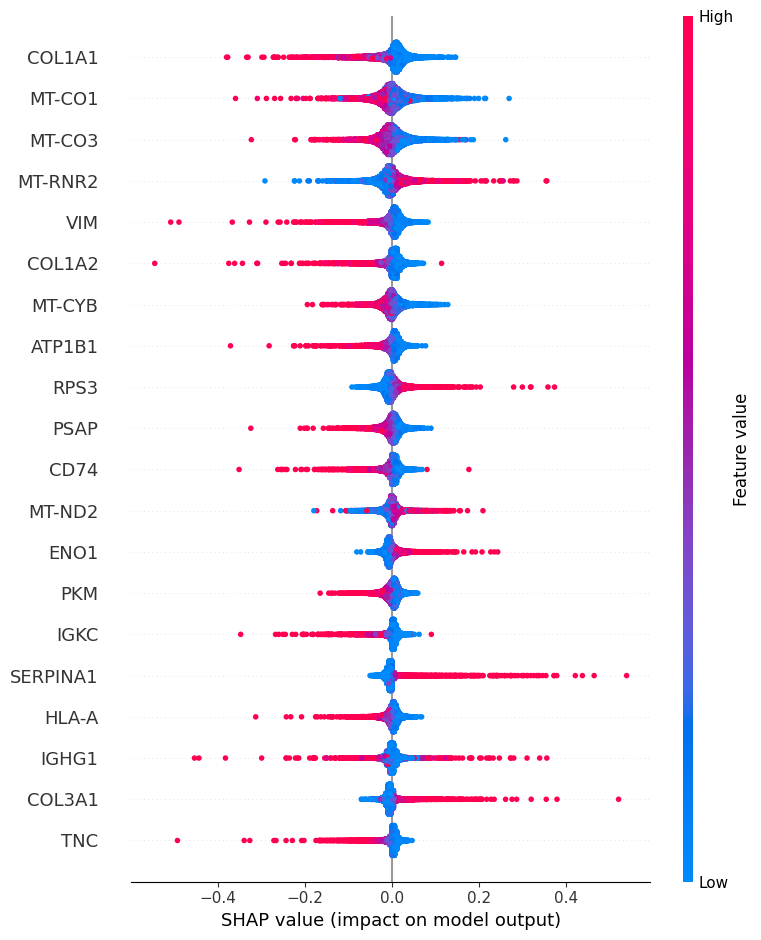

In [ ]:
import shap
shap.summary_plot(
    shap_values_np_499,          # los valores SHAP
    features=X_499,          # las variables explicativas
    feature_names=feature_names_origina_499l,  # nombres de las features
    plot_type="dot"          # (o "bar", si prefieres ese estilo)
)


In [ ]:
import pandas as pd
import pandas as pd
from scipy.stats import zscore

clinicos = pd.read_pickle('/content/drive/MyDrive/pan_cancer_diner/2025_pan_cancer/datos/meta_sinFPPP.pkl')

df = pd.read_pickle('/content/drive/MyDrive/pan_cancer_diner/2025_pan_cancer/datos/df_sinFPPP_2.pkl')

# Aplicar Z-score normalization a todas las filas
df_z_norm = df.apply(zscore, axis=1)
df= df_z_norm
# Mostrar el DataFrame normalizado
print(df)
clinicos = clinicos.dropna(subset=['vital'])
clinicos = clinicos.dropna(subset=['panel'])
df['vital'] = clinicos['vital']
df['panel'] = clinicos['panel']
df = df.dropna(subset=['vital'])
df = df.dropna(subset=['panel'])
df

0                                      5S_rRNA  5_8S_rRNA       7SK      A1BG  \
9fe7d0f4-866d-490f-b2cb-d9be7da889de -0.070030  -0.070030 -0.062088  0.036031   
dd74434f-300f-4798-8342-aad31b192e12 -0.131387  -0.131507  0.018754 -0.130546   
07db9e9d-059d-4e6c-b483-81517a492b96 -0.197439  -0.197439 -0.190100 -0.197081   
47ee860a-fd18-48f2-bfe7-4e19391950bd -0.058225  -0.058225 -0.055153  0.397881   
e322b0e5-458a-4cbf-a64f-9b348e413939 -0.173458  -0.173754 -0.170502 -0.173458   
...                                        ...        ...       ...       ...   
62cb41b1-8960-4fa2-8f74-38dd174af004 -0.150401  -0.150758 -0.144578 -0.149094   
673a85f3-ba5e-448a-acee-dfec77b5238e -0.135007  -0.135346 -0.116271 -0.130831   
3d93b2ae-7730-4914-af23-ff3554752922 -0.092573  -0.092495  0.216627 -0.091793   
85a0b88f-2b89-4117-9e04-b81fad7f2e1b -0.132607  -0.133836  0.020155 -0.120158   
a512642f-b720-4efb-a4e9-49b746980809 -0.064709  -0.064791 -0.060806 -0.063123   

0                          

0                                      5S_rRNA  5_8S_rRNA       7SK      A1BG  \
9fe7d0f4-866d-490f-b2cb-d9be7da889de -0.070030  -0.070030 -0.062088  0.036031   
dd74434f-300f-4798-8342-aad31b192e12 -0.131387  -0.131507  0.018754 -0.130546   
07db9e9d-059d-4e6c-b483-81517a492b96 -0.197439  -0.197439 -0.190100 -0.197081   
47ee860a-fd18-48f2-bfe7-4e19391950bd -0.058225  -0.058225 -0.055153  0.397881   
e322b0e5-458a-4cbf-a64f-9b348e413939 -0.173458  -0.173754 -0.170502 -0.173458   
...                                        ...        ...       ...       ...   
62cb41b1-8960-4fa2-8f74-38dd174af004 -0.150401  -0.150758 -0.144578 -0.149094   
673a85f3-ba5e-448a-acee-dfec77b5238e -0.135007  -0.135346 -0.116271 -0.130831   
3d93b2ae-7730-4914-af23-ff3554752922 -0.092573  -0.092495  0.216627 -0.091793   
85a0b88f-2b89-4117-9e04-b81fad7f2e1b -0.132607  -0.133836  0.020155 -0.120158   
a512642f-b720-4efb-a4e9-49b746980809 -0.064709  -0.064791 -0.060806 -0.063123   

0                                     A1BG-AS1      A1CF        A2M   A2M-AS1  \
9fe7d0f4-866d-490f-b2cb-d9be7da889de -0.068824  0.260822   0.594890 -0.068924   
dd74434f-300f-4798-8342-aad31b192e12 -0.125377 -0.131147   2.814815 -0.124896   
07db9e9d-059d-4e6c-b483-81517a492b96 -0.191174  0.092194   3.602343 -0.192248   
47ee860a-fd18-48f2-bfe7-4e19391950bd -0.049148  0.235994   4.346427 -0.054794   
e322b0e5-458a-4cbf-a64f-9b348e413939 -0.173754 -0.173458   0.933174 -0.171093   
...                                        ...       ...        ...       ...   
62cb41b1-8960-4fa2-8f74-38dd174af004 -0.141725  0.202342  13.042433 -0.139824   
673a85f3-ba5e-448a-acee-dfec77b5238e -0.119319 -0.134894   2.713737 -0.132298   
3d93b2ae-7730-4914-af23-ff3554752922 -0.088358 -0.092339   2.448316 -0.090544   
85a0b88f-2b89-4117-9e04-b81fad7f2e1b -0.092188 -0.133990  -0.083121 -0.119236   
a512642f-b720-4efb-a4e9-49b746980809 -0.058529 -0.064750   1.420914 -0.060440   

0                                        A2ML1  A2ML1-AS1  ...    ZYG11B  \
9fe7d0f4-866d-490f-b2cb-d9be7da889de -0.070030  -0.070030  ... -0.014034   
dd74434f-300f-4798-8342-aad31b192e12 -0.117082  -0.131507  ... -0.015746   
07db9e9d-059d-4e6c-b483-81517a492b96 -0.197260  -0.197439  ...  0.184920   
47ee860a-fd18-48f2-bfe7-4e19391950bd -0.058197  -0.058225  ...  0.036333   
e322b0e5-458a-4cbf-a64f-9b348e413939  0.079621  -0.173754  ...  0.144813   
...                                        ...        ...  ...       ...   
62cb41b1-8960-4fa2-8f74-38dd174af004 -0.150045  -0.150758  ...  0.320954   
673a85f3-ba5e-448a-acee-dfec77b5238e -0.104082  -0.135346  ...  0.171312   
3d93b2ae-7730-4914-af23-ff3554752922 -0.070014  -0.092495  ...  0.107888   
85a0b88f-2b89-4117-9e04-b81fad7f2e1b -0.125537  -0.133990  ...  0.113595   
a512642f-b720-4efb-a4e9-49b746980809 -0.064059  -0.064791  ...  0.100179   

0                                          ZYX     ZYXP1     ZZEF1      ZZZ3  \
9fe7d0f4-866d-490f-b2cb-d9be7da889de  0.244636 -0.070030 -0.038463 -0.022881   
dd74434f-300f-4798-8342-aad31b192e12  1.144992 -0.131507  0.067559  0.006252   
07db9e9d-059d-4e6c-b483-81517a492b96  2.271605 -0.197439  0.458980  0.275319   
47ee860a-fd18-48f2-bfe7-4e19391950bd -0.033679 -0.058225 -0.007805 -0.005896   
e322b0e5-458a-4cbf-a64f-9b348e413939  1.811118 -0.173754  0.033795  0.153683   
...                                        ...       ...       ...       ...   
62cb41b1-8960-4fa2-8f74-38dd174af004  1.168704 -0.150758  0.369920  0.156348   
673a85f3-ba5e-448a-acee-dfec77b5238e  1.518935 -0.135346 -0.012322  0.109010   
3d93b2ae-7730-4914-af23-ff3554752922  0.236532 -0.092573  0.160267 -0.021694   
85a0b88f-2b89-4117-9e04-b81fad7f2e1b  2.878835 -0.133990  0.979759  0.476136   
a512642f-b720-4efb-a4e9-49b746980809  0.269825 -0.064791  0.138809  0.068299   

0                                     hsa-mir-1253  hsa-mir-423   snoZ196  \
9fe7d0f4-866d-490f-b2cb-d9be7da889de     -0.070030    -0.070030 -0.069729   
dd74434f-300f-4798-8342-aa

#XGBOOST



In [ ]:
vanilla_shap = pd.DataFrame(X_499 , index= df.index, columns= feature_names_origina_499l)
vanilla_shap

In [ ]:
from sklearn.decomposition import PCA
import umap
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Estilo minimalista
sns.set(style='white', rc={'axes.facecolor': 'white', 'figure.facecolor': 'white'})

# Verificamos que los índices coincidan
assert (vanilla_shap.index == df.index).all()

# PCA con 50 componentes
pca = PCA(n_components=50, random_state=42)
pca_result = pca.fit_transform(vanilla_shap)

# UMAP
reducer = umap.UMAP(n_components=2, random_state=42)
umap_coords = reducer.fit_transform(pca_result)

# UMAP DataFrame
umap_df = pd.DataFrame(umap_coords, columns=['UMAP1', 'UMAP2'], index=vanilla_shap.index)
umap_df = pd.concat([umap_df, df[['vital', 'panel']]], axis=1)

# Visualización
fig, axes = plt.subplots(1, 2, figsize=(14*2, 6*2))

# Sin ejes
for ax in axes:
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel("")
    ax.set_ylabel("")
    sns.despine(ax=ax, left=True, bottom=True)

# UMAP por vital
sns.scatterplot(
    data=umap_df, x='UMAP1', y='UMAP2',
    hue='vital', palette='coolwarm', alpha=0.6,
    ax=axes[0], s=20
)
axes[0].set_title('Vital Status', fontsize=12)
axes[0].legend(title='Vital', loc='upper right', frameon=False)

# UMAP por panel
sns.scatterplot(
    data=umap_df, x='UMAP1', y='UMAP2',
    hue='panel', alpha=0.6,
    ax=axes[1], s=20, legend='full'
)
axes[1].set_title('Cancer Panel', fontsize=12)

# Leyenda dividida en columnas (ideal para 33 paneles)
handles, labels = axes[1].get_legend_handles_labels()
axes[1].legend(handles=handles, labels=labels, title='Panel',
               loc='upper left', bbox_to_anchor=(1.01, 1),
               ncol=3, frameon=False, fontsize=8, title_fontsize=10)

plt.tight_layout()
plt.show()



In [ ]:
df

0                                      5S_rRNA  5_8S_rRNA       7SK      A1BG  \
9fe7d0f4-866d-490f-b2cb-d9be7da889de -0.070030  -0.070030 -0.062088  0.036031   
dd74434f-300f-4798-8342-aad31b192e12 -0.131387  -0.131507  0.018754 -0.130546   
07db9e9d-059d-4e6c-b483-81517a492b96 -0.197439  -0.197439 -0.190100 -0.197081   
47ee860a-fd18-48f2-bfe7-4e19391950bd -0.058225  -0.058225 -0.055153  0.397881   
e322b0e5-458a-4cbf-a64f-9b348e413939 -0.173458  -0.173754 -0.170502 -0.173458   
...                                        ...        ...       ...       ...   
62cb41b1-8960-4fa2-8f74-38dd174af004 -0.150401  -0.150758 -0.144578 -0.149094   
673a85f3-ba5e-448a-acee-dfec77b5238e -0.135007  -0.135346 -0.116271 -0.130831   
3d93b2ae-7730-4914-af23-ff3554752922 -0.092573  -0.092495  0.216627 -0.091793   
85a0b88f-2b89-4117-9e04-b81fad7f2e1b -0.132607  -0.133836  0.020155 -0.120158   
a512642f-b720-4efb-a4e9-49b746980809 -0.064709  -0.064791 -0.060806 -0.063123   

0                                     A1BG-AS1      A1CF        A2M   A2M-AS1  \
9fe7d0f4-866d-490f-b2cb-d9be7da889de -0.068824  0.260822   0.594890 -0.068924   
dd74434f-300f-4798-8342-aad31b192e12 -0.125377 -0.131147   2.814815 -0.124896   
07db9e9d-059d-4e6c-b483-81517a492b96 -0.191174  0.092194   3.602343 -0.192248   
47ee860a-fd18-48f2-bfe7-4e19391950bd -0.049148  0.235994   4.346427 -0.054794   
e322b0e5-458a-4cbf-a64f-9b348e413939 -0.173754 -0.173458   0.933174 -0.171093   
...                                        ...       ...        ...       ...   
62cb41b1-8960-4fa2-8f74-38dd174af004 -0.141725  0.202342  13.042433 -0.139824   
673a85f3-ba5e-448a-acee-dfec77b5238e -0.119319 -0.134894   2.713737 -0.132298   
3d93b2ae-7730-4914-af23-ff3554752922 -0.088358 -0.092339   2.448316 -0.090544   
85a0b88f-2b89-4117-9e04-b81fad7f2e1b -0.092188 -0.133990  -0.083121 -0.119236   
a512642f-b720-4efb-a4e9-49b746980809 -0.058529 -0.064750   1.420914 -0.060440   

0                                        A2ML1  A2ML1-AS1  ...    ZYG11B  \
9fe7d0f4-866d-490f-b2cb-d9be7da889de -0.070030  -0.070030  ... -0.014034   
dd74434f-300f-4798-8342-aad31b192e12 -0.117082  -0.131507  ... -0.015746   
07db9e9d-059d-4e6c-b483-81517a492b96 -0.197260  -0.197439  ...  0.184920   
47ee860a-fd18-48f2-bfe7-4e19391950bd -0.058197  -0.058225  ...  0.036333   
e322b0e5-458a-4cbf-a64f-9b348e413939  0.079621  -0.173754  ...  0.144813   
...                                        ...        ...  ...       ...   
62cb41b1-8960-4fa2-8f74-38dd174af004 -0.150045  -0.150758  ...  0.320954   
673a85f3-ba5e-448a-acee-dfec77b5238e -0.104082  -0.135346  ...  0.171312   
3d93b2ae-7730-4914-af23-ff3554752922 -0.070014  -0.092495  ...  0.107888   
85a0b88f-2b89-4117-9e04-b81fad7f2e1b -0.125537  -0.133990  ...  0.113595   
a512642f-b720-4efb-a4e9-49b746980809 -0.064059  -0.064791  ...  0.100179   

0                                          ZYX     ZYXP1     ZZEF1      ZZZ3  \
9fe7d0f4-866d-490f-b2cb-d9be7da889de  0.244636 -0.070030 -0.038463 -0.022881   
dd74434f-300f-4798-8342-aad31b192e12  1.144992 -0.131507  0.067559  0.006252   
07db9e9d-059d-4e6c-b483-81517a492b96  2.271605 -0.197439  0.458980  0.275319   
47ee860a-fd18-48f2-bfe7-4e19391950bd -0.033679 -0.058225 -0.007805 -0.005896   
e322b0e5-458a-4cbf-a64f-9b348e413939  1.811118 -0.173754  0.033795  0.153683   
...                                        ...       ...       ...       ...   
62cb41b1-8960-4fa2-8f74-38dd174af004  1.168704 -0.150758  0.369920  0.156348   
673a85f3-ba5e-448a-acee-dfec77b5238e  1.518935 -0.135346 -0.012322  0.109010   
3d93b2ae-7730-4914-af23-ff3554752922  0.236532 -0.092573  0.160267 -0.021694   
85a0b88f-2b89-4117-9e04-b81fad7f2e1b  2.878835 -0.133990  0.979759  0.476136   
a512642f-b720-4efb-a4e9-49b746980809  0.269825 -0.064791  0.138809  0.068299   

0                                     hsa-mir-1253  hsa-mir-423   snoZ196  \
9fe7d0f4-866d-490f-b2cb-d9be7da889de     -0.070030    -0.070030 -0.069729   
dd74434f-300f-4798-8342-aa

In [ ]:
# Calculamos la importancia media de cada feature
shap_importance = vanilla_shap.abs().mean().sort_values(ascending=False)

# Seleccionamos las 300 más importantes
top300_features = shap_importance.head(300).index

# Filtramos el DataFrame original de SHAP
vanilla_shap_top300 = vanilla_shap[top300_features]
vanilla_shap_top300.columns #<- son las columnas que queremos de genes del top para reducir la matriz df como imput para xgboost
df #<- este tiene la matrz de expresion y la columna vital y panel también en las ultimas columnas también es la expresion

0                                      5S_rRNA  5_8S_rRNA       7SK      A1BG  \
9fe7d0f4-866d-490f-b2cb-d9be7da889de -0.070030  -0.070030 -0.062088  0.036031   
dd74434f-300f-4798-8342-aad31b192e12 -0.131387  -0.131507  0.018754 -0.130546   
07db9e9d-059d-4e6c-b483-81517a492b96 -0.197439  -0.197439 -0.190100 -0.197081   
47ee860a-fd18-48f2-bfe7-4e19391950bd -0.058225  -0.058225 -0.055153  0.397881   
e322b0e5-458a-4cbf-a64f-9b348e413939 -0.173458  -0.173754 -0.170502 -0.173458   
...                                        ...        ...       ...       ...   
62cb41b1-8960-4fa2-8f74-38dd174af004 -0.150401  -0.150758 -0.144578 -0.149094   
673a85f3-ba5e-448a-acee-dfec77b5238e -0.135007  -0.135346 -0.116271 -0.130831   
3d93b2ae-7730-4914-af23-ff3554752922 -0.092573  -0.092495  0.216627 -0.091793   
85a0b88f-2b89-4117-9e04-b81fad7f2e1b -0.132607  -0.133836  0.020155 -0.120158   
a512642f-b720-4efb-a4e9-49b746980809 -0.064709  -0.064791 -0.060806 -0.063123   

0                                     A1BG-AS1      A1CF        A2M   A2M-AS1  \
9fe7d0f4-866d-490f-b2cb-d9be7da889de -0.068824  0.260822   0.594890 -0.068924   
dd74434f-300f-4798-8342-aad31b192e12 -0.125377 -0.131147   2.814815 -0.124896   
07db9e9d-059d-4e6c-b483-81517a492b96 -0.191174  0.092194   3.602343 -0.192248   
47ee860a-fd18-48f2-bfe7-4e19391950bd -0.049148  0.235994   4.346427 -0.054794   
e322b0e5-458a-4cbf-a64f-9b348e413939 -0.173754 -0.173458   0.933174 -0.171093   
...                                        ...       ...        ...       ...   
62cb41b1-8960-4fa2-8f74-38dd174af004 -0.141725  0.202342  13.042433 -0.139824   
673a85f3-ba5e-448a-acee-dfec77b5238e -0.119319 -0.134894   2.713737 -0.132298   
3d93b2ae-7730-4914-af23-ff3554752922 -0.088358 -0.092339   2.448316 -0.090544   
85a0b88f-2b89-4117-9e04-b81fad7f2e1b -0.092188 -0.133990  -0.083121 -0.119236   
a512642f-b720-4efb-a4e9-49b746980809 -0.058529 -0.064750   1.420914 -0.060440   

0                                        A2ML1  A2ML1-AS1  ...    ZYG11B  \
9fe7d0f4-866d-490f-b2cb-d9be7da889de -0.070030  -0.070030  ... -0.014034   
dd74434f-300f-4798-8342-aad31b192e12 -0.117082  -0.131507  ... -0.015746   
07db9e9d-059d-4e6c-b483-81517a492b96 -0.197260  -0.197439  ...  0.184920   
47ee860a-fd18-48f2-bfe7-4e19391950bd -0.058197  -0.058225  ...  0.036333   
e322b0e5-458a-4cbf-a64f-9b348e413939  0.079621  -0.173754  ...  0.144813   
...                                        ...        ...  ...       ...   
62cb41b1-8960-4fa2-8f74-38dd174af004 -0.150045  -0.150758  ...  0.320954   
673a85f3-ba5e-448a-acee-dfec77b5238e -0.104082  -0.135346  ...  0.171312   
3d93b2ae-7730-4914-af23-ff3554752922 -0.070014  -0.092495  ...  0.107888   
85a0b88f-2b89-4117-9e04-b81fad7f2e1b -0.125537  -0.133990  ...  0.113595   
a512642f-b720-4efb-a4e9-49b746980809 -0.064059  -0.064791  ...  0.100179   

0                                          ZYX     ZYXP1     ZZEF1      ZZZ3  \
9fe7d0f4-866d-490f-b2cb-d9be7da889de  0.244636 -0.070030 -0.038463 -0.022881   
dd74434f-300f-4798-8342-aad31b192e12  1.144992 -0.131507  0.067559  0.006252   
07db9e9d-059d-4e6c-b483-81517a492b96  2.271605 -0.197439  0.458980  0.275319   
47ee860a-fd18-48f2-bfe7-4e19391950bd -0.033679 -0.058225 -0.007805 -0.005896   
e322b0e5-458a-4cbf-a64f-9b348e413939  1.811118 -0.173754  0.033795  0.153683   
...                                        ...       ...       ...       ...   
62cb41b1-8960-4fa2-8f74-38dd174af004  1.168704 -0.150758  0.369920  0.156348   
673a85f3-ba5e-448a-acee-dfec77b5238e  1.518935 -0.135346 -0.012322  0.109010   
3d93b2ae-7730-4914-af23-ff3554752922  0.236532 -0.092573  0.160267 -0.021694   
85a0b88f-2b89-4117-9e04-b81fad7f2e1b  2.878835 -0.133990  0.979759  0.476136   
a512642f-b720-4efb-a4e9-49b746980809  0.269825 -0.064791  0.138809  0.068299   

0                                     hsa-mir-1253  hsa-mir-423   snoZ196  \
9fe7d0f4-866d-490f-b2cb-d9be7da889de     -0.070030    -0.070030 -0.069729   
dd74434f-300f-4798-8342-aa

In [ ]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from sklearn.preprocessing import LabelEncoder
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import pandas as pd
from torchsummary import summary  # Para imprimir el resumen del modelo
# Definición del modelo DANN mejorado (igual al anterior)
class FeatureExtractor(nn.Module):
    def __init__(self, input_dim):
        super(FeatureExtractor, self).__init__()
        self.fc1 = nn.Linear(input_dim, 1000)
        self.bn1 = nn.BatchNorm1d(1000)
        self.dropout1 = nn.Dropout(0.1)

        # Inicialización de He
        nn.init.kaiming_normal_(self.fc1.weight, nonlinearity='leaky_relu')

    def forward(self, x, lambda_=1.0):
        x = F.leaky_relu(self.bn1(self.fc1(x)))
        x = self.dropout1(x)
        return x

class LabelPredictor(nn.Module):
    def __init__(self, input_dim):
        super(LabelPredictor, self).__init__()
        self.fc1 = nn.Linear(input_dim, 1000)
        self.bn1 = nn.BatchNorm1d(1000)
        self.dropout1 = nn.Dropout(0.1)
        self.fc2 = nn.Linear(1000, 1000)
        self.bn2 = nn.BatchNorm1d(1000)
        self.dropout2 = nn.Dropout(0.1)
        self.fc3 = nn.Linear(1000, 1)

        # Inicialización de He
        nn.init.kaiming_normal_(self.fc1.weight, nonlinearity='leaky_relu')
        nn.init.kaiming_normal_(self.fc2.weight, nonlinearity='leaky_relu')
        nn.init.kaiming_normal_(self.fc3.weight, nonlinearity='leaky_relu')

    def forward(self, x):
        x = F.leaky_relu(self.bn1(self.fc1(x)))
        x = self.dropout1(x)
        x = F.leaky_relu(self.bn2(self.fc2(x)))
        x = self.dropout2(x)
        x = torch.sigmoid(self.fc3(x))
        return x

class DomainClassifier(nn.Module):
    def __init__(self, input_dim, num_domains):
        super(DomainClassifier, self).__init__()
        self.fc1 = nn.Linear(input_dim, 1000)
        self.bn1 = nn.BatchNorm1d(1000)
        self.dropout1 = nn.Dropout(0.1)
        self.fc2 = nn.Linear(1000, 1000)
        self.bn2 = nn.BatchNorm1d(1000)
        self.dropout2 = nn.Dropout(0.1)
        self.fc3 = nn.Linear(1000, num_domains)

        # Inicialización de He
        nn.init.kaiming_normal_(self.fc1.weight, nonlinearity='leaky_relu')
        nn.init.kaiming_normal_(self.fc2.weight, nonlinearity='leaky_relu')
        nn.init.kaiming_normal_(self.fc3.weight, nonlinearity='leaky_relu')

    def forward(self, x):
        x = F.leaky_relu(self.bn1(self.fc1(x)))
        x = self.dropout1(x)
        x = F.leaky_relu(self.bn2(self.fc2(x)))
        x = self.dropout2(x)
        x = self.fc3(x)
        return x

class DANN(nn.Module):
    def __init__(self, feature_dim, num_domains):
        super(DANN, self).__init__()
        self.feature_extractor = FeatureExtractor(feature_dim)
        self.label_predictor = LabelPredictor(1000)
        self.domain_classifier = DomainClassifier(1000, num_domains)

    def forward(self, x, lambda_=1.0):
        features = self.feature_extractor(x)
        reverse_features = ReverseLayerF.apply(features, lambda_)
        label_output = self.label_predictor(features)
        domain_output = self.domain_classifier(reverse_features)
        return label_output, domain_output, features

class ReverseLayerF(torch.autograd.Function):
    @staticmethod
    def forward(ctx, x, lambda_):
        ctx.lambda_ = lambda_
        return x.view_as(x)

    @staticmethod
    def backward(ctx, grad_output):
        return grad_output.neg() * ctx.lambda_, None


In [ ]:
import os
import torch
import pandas as pd
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import LabelEncoder

def process_model_and_data(df, epoch_to_load, device='cpu', batch_size=128):
    # Preparar los datos del DataFrame
    X = df.iloc[:, :-2].values  # Datos de las características (miRNAs u otras variables)
    Y = df['vital'].replace({'Alive': 1, 'Dead': 0}).values  # Estado vital (Alive = 1, Dead = 0)
    panels = df['panel'].values  # Etiquetas del dominio (paneles)

    # Convertir la columna 'panel' a valores numéricos usando LabelEncoder
    label_encoder_panel = LabelEncoder()
    panels = label_encoder_panel.fit_transform(panels)

    # Convertir los datos en tensores para PyTorch
    X_tensor = torch.tensor(X, dtype=torch.float32).to(device)
    Y_tensor = torch.tensor(Y, dtype=torch.float32).unsqueeze(1).to(device)
    panels_tensor = torch.tensor(panels, dtype=torch.long).to(device)

    # Crear el DataLoader
    dataset = TensorDataset(X_tensor, Y_tensor, panels_tensor)
    loader = DataLoader(dataset, batch_size=batch_size, shuffle=False)

    # Cargar el modelo de la época deseada
    model_path = f'/content/drive/MyDrive/umaps_pan_cancer/mis_modelos/model_epoch_{epoch_to_load}.pth'
    input_dim = X.shape[1]
    num_domains = len(label_encoder_panel.classes_)  # Número de paneles (dominios)

    # Definir la arquitectura del modelo DANN
    model = DANN(input_dim, num_domains).to(device)

    # Cargar los pesos del modelo
    model.load_state_dict(torch.load(model_path, map_location=device))
    model.eval()  # Poner el modelo en modo de evaluación

    print(f"Modelo de la época {epoch_to_load} cargado exitosamente.")

    return model, loader

# Ejemplo de uso:
epoch_to_load = 499
device = 'cuda'  # O 'cpu', según tu entorno

# Suponiendo que ya tienes un DataFrame 'df' con las columnas necesarias
model, loader = process_model_and_data(df, epoch_to_load, device)


<ipython-input-6-f515e05f413a>:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Y = df['vital'].replace({'Alive': 1, 'Dead': 0}).values  # Estado vital (Alive = 1, Dead = 0)


Modelo de la época 499 cargado exitosamente.


In [ ]:
# 🔍 Imprimir TODAS las capas del modelo con sus nombres
for name, module in model.named_modules():
    print(name)



feature_extractor
feature_extractor.fc1
feature_extractor.bn1
feature_extractor.dropout1
label_predictor
label_predictor.fc1
label_predictor.bn1
label_predictor.dropout1
label_predictor.fc2
label_predictor.bn2
label_predictor.dropout2
label_predictor.fc3
domain_classifier
domain_classifier.fc1
domain_classifier.bn1
domain_classifier.dropout1
domain_classifier.fc2
domain_classifier.bn2
domain_classifier.dropout2
domain_classifier.fc3


In [ ]:
!pip install captum


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 25.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 101.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 115.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 88.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 59.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 41.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

Tamaño de la matriz de atribuciones: (10286, 39979)
Tamaño después de PCA: (10286, 50)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Tamaño de la proyección UMAP: (10286, 2)


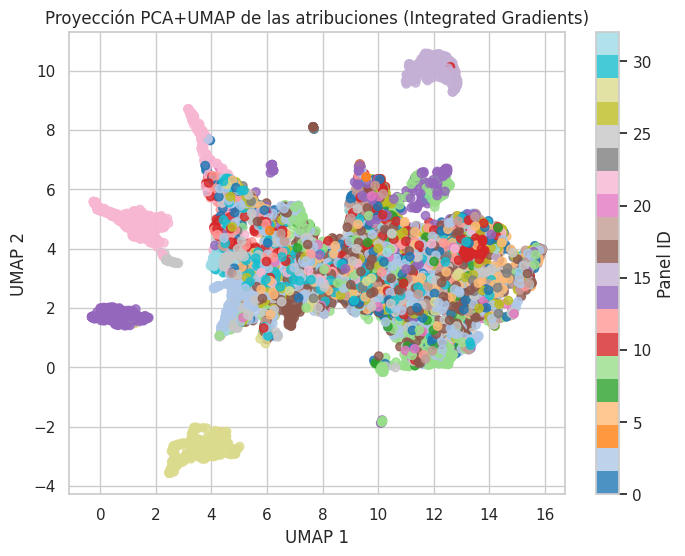

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import umap
from captum.attr import IntegratedGradients

###############################
# 1) Definir función de forward
###############################
# Queremos calcular las atribuciones con respecto a la salida de 'label_predictor'
# (probabilidad de la clase Alive/Dead).
# Para ello, definimos una función que dado un batch,
# devuelva la salida del modelo para la predicción del label.

def forward_label_predictor(x):
    """
    x: batch de inputs con tamaño (batch_size, num_features)
    returns: salida del label predictor (batch_size, 1)
    """
    # El modelo DANN al hacer forward devuelve:
    #    label_output, domain_output, features
    # Nos interesa solamente la salida de label_output para la atribución
    label_output, _, _ = model(x, lambda_=100.0)
    return label_output

###############################
# 2) Instanciar IntegratedGradients
###############################
ig = IntegratedGradients(forward_label_predictor)

###############################
# 3) Calcular atribuciones
###############################
all_attributions = []
all_panels = []

# Definimos un baseline típico (capa de entrada en cero) del mismo tamaño que el batch
# Si quieres un baseline más elaborado, podrías usar la media de todo X_tensor.
baseline = torch.zeros_like(next(iter(loader))[0])

model.eval()
with torch.no_grad():
    # Aunque IntegratedGradients internamente necesitará gradientes,
    # la parte del loader la hacemos sin entrenar, por eso "no_grad()".
    pass

# Ahora sí calculamos las atribuciones con gradientes (quitamos "no_grad" localmente)
model.train()  # Para permitir gradientes en la parte del forward de la red
with torch.enable_grad():
    for batch_x, batch_y, batch_panels in loader:
        batch_x = batch_x.to(device)
        batch_panels = batch_panels.to(device)

        # Calculamos las atribuciones en este batch
        # OJO: IntegratedGradients sí requiere que "requires_grad=True" en batch_x
        batch_x.requires_grad_()

        attributions = ig.attribute(
            batch_x,
            baselines=baseline[:len(batch_x)],  # ← en plural
            target=None,
            n_steps=50
        )

        # Desconectamos de la gráfica y pasamos a numpy
        attributions = attributions.detach().cpu().numpy()

        all_attributions.append(attributions)
        all_panels.append(batch_panels.detach().cpu().numpy())

# Concatenamos todas las atribuciones y paneles
all_attributions = np.concatenate(all_attributions, axis=0)
all_panels = np.concatenate(all_panels, axis=0)

print("Tamaño de la matriz de atribuciones:", all_attributions.shape)
# Debería ser (num_muestras, num_features)

from sklearn.decomposition import PCA

########################################
# 4) PCA seguido de UMAP sobre las atribuciones
########################################

# 4.1 Reducimos primero con PCA
pca = PCA(n_components=50, random_state=42)
pca_result = pca.fit_transform(all_attributions)

print("Tamaño después de PCA:", pca_result.shape)  # (n_samples, 50)

# 4.2 Luego aplicamos UMAP sobre los componentes principales
umap_reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, random_state=42)
umap_embedding = umap_reducer.fit_transform(pca_result)

print("Tamaño de la proyección UMAP:", umap_embedding.shape)  # (n_samples, 2)

########################################
# 5) Visualizar con scatter plot coloreado por panel
########################################
plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    umap_embedding[:, 0],
    umap_embedding[:, 1],
    c=all_panels,
    cmap='tab20',  # Puedes cambiar el colormap según la cantidad de paneles
    alpha=0.8
)
plt.colorbar(scatter, label="Panel ID")
plt.title("Proyección PCA+UMAP de las atribuciones (Integrated Gradients)")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.show()



Shape del baseline balanceado: (39979,)
Tamaño de la matriz de atribuciones: (10286, 39979)
Tamaño después de PCA: (10286, 50)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Tamaño de la proyección UMAP: (10286, 2)


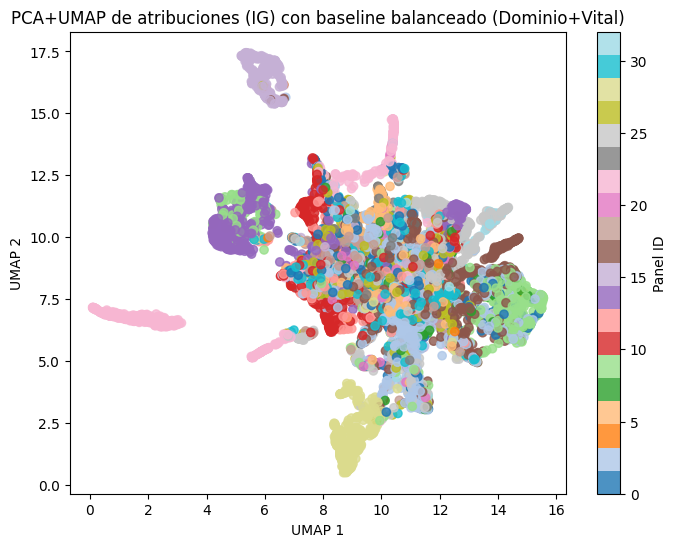

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import umap
from captum.attr import IntegratedGradients
from sklearn.decomposition import PCA

###############################
# 1) Preparar baseline balanceado por Panel & Vital
###############################

# 1.1 Extraer nombres de dominios (panel) y estados vitales (vital) únicos
unique_panels = df['panel'].unique()       # p.ej. ["PanelA", "PanelB", ...]
unique_vitals = df['vital'].unique()       # p.ej. ["Alive", "Dead"]

baseline_vectors = []

# 1.2 Para cada combinación (panel, vital), calcula el vector medio de características
for panel in unique_panels:
    for vital_status in unique_vitals:
        subset = df[(df['panel'] == panel) & (df['vital'] == vital_status)]
        if len(subset) > 0:
            # Extrae sólo columnas de características (en tu DF, asumiendo que las últimas 2 son 'vital' y 'panel')
            mean_vector = subset.iloc[:, :-2].mean().values  # shape: (num_features,)
            baseline_vectors.append(mean_vector)

# 1.3 Promedia todos los vectores medios para obtener un único baseline
balanced_baseline_np = np.mean(baseline_vectors, axis=0)     # shape: (num_features,)
print("Shape del baseline balanceado:", balanced_baseline_np.shape)

# 1.4 Convierte a Torch Tensor y llévalo a GPU/CPU según corresponda
balanced_baseline_torch = torch.tensor(balanced_baseline_np, dtype=torch.float32).to(device)

###############################
# 2) Definir función de forward
###############################
def forward_label_predictor(x):
    """
    x: batch de inputs con tamaño (batch_size, num_features)
    returns: salida del label predictor (batch_size, 1)
    """
    label_output, _, _ = model(x, lambda_=0.01)
    return label_output

###############################
# 3) Instanciar IntegratedGradients
###############################
ig = IntegratedGradients(forward_label_predictor)

###############################
# 4) Calcular atribuciones (IG)
###############################
all_attributions = []
all_panels = []

model.eval()
model.train()  # Permitimos gradientes para el forward en IG

with torch.enable_grad():
    for batch_x, batch_y, batch_panels in loader:
        batch_x = batch_x.to(device)
        batch_panels = batch_panels.to(device)

        # IG necesita que la entrada requiera gradientes
        batch_x.requires_grad_()

        # Construimos el baseline para este batch repitiendo el baseline balanceado
        baseline_batch = balanced_baseline_torch.repeat(batch_x.size(0), 1)

        # Calculamos atribuciones
        attributions = ig.attribute(
            batch_x,
            baselines=baseline_batch,
            target=None,
            n_steps=50
        )

        # Desconectamos de la gráfica y pasamos a numpy
        attributions = attributions.detach().cpu().numpy()
        all_attributions.append(attributions)
        all_panels.append(batch_panels.detach().cpu().numpy())

# Concatenar todas las atribuciones y paneles
all_attributions = np.concatenate(all_attributions, axis=0)  # (num_samples, num_features)
all_panels = np.concatenate(all_panels, axis=0)

print("Tamaño de la matriz de atribuciones:", all_attributions.shape)

###############################
# 5) Reducir primero con PCA, luego UMAP
###############################
pca = PCA(n_components=50, random_state=42)
pca_result = pca.fit_transform(all_attributions)
print("Tamaño después de PCA:", pca_result.shape)

umap_reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, random_state=42)
umap_embedding = umap_reducer.fit_transform(pca_result)
print("Tamaño de la proyección UMAP:", umap_embedding.shape)

###############################
# 6) Visualizar con scatter plot
###############################
plt.figure(figsize=(8,6))
scatter = plt.scatter(
    umap_embedding[:, 0],
    umap_embedding[:, 1],
    c=all_panels,
    cmap='tab20',
    alpha=0.8
)
plt.colorbar(scatter, label="Panel ID")
plt.title("PCA+UMAP de atribuciones (IG) con baseline balanceado (Dominio+Vital)")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.show()


In [ ]:
import captum
print(captum.__version__)


0.8.0


In [ ]:
!pip install captum


In [ ]:
# TAMPOCO FUNCIONA captum
import os
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import LabelEncoder
from captum.attr import IntegratedGradients
from sklearn.decomposition import PCA
import umap

sns.set(style='whitegrid')
torch.set_float32_matmul_precision('high')


# =======================
# 1. MODELO COMPLETO PARA 'vital'
# =======================
class FullModel(torch.nn.Module):
    def __init__(self, base_model):
        super().__init__()
        self.feature_extractor = base_model.feature_extractor
        self.label_predictor = base_model.label_predictor
    def forward(self, x):
        # Salida shape: [N, 1] -> binaria
        return self.label_predictor(self.feature_extractor(x))


# =======================
# 2. FUNCIÓN IG BATCHWISE
# =======================
def run_integrated_gradients_on_vital_batchwise(
    df, epoch_to_load=499, device='cuda', baseline_type="zeros",
    batch_size=256, n_steps=20
):
    """
    - Calcula Integrated Gradients de la predicción 'vital' (Alive/Dead)
      por lotes, para evitar OOM.
    - Asume que label_predictor produce salida [N,1], por lo que target=0.
    - Devuelve attributions_np (numpy), X (numpy), Y (array), panels (array).
    """

    # === Preparar datos ===
    X = df.iloc[:, :-2].values
    Y = df['vital'].replace({'Alive': 1, 'Dead': 0}).values
    panels = df['panel'].values

    X_tensor = torch.tensor(X, dtype=torch.float32)
    dataset = TensorDataset(X_tensor)
    loader = DataLoader(dataset, batch_size=batch_size, shuffle=False)

    # === Cargar modelo DANN ===
    input_dim = X.shape[1]
    num_domains = len(np.unique(panels))
    model_path = f'/content/drive/MyDrive/umaps_pan_cancer/mis_modelos/model_epoch_{epoch_to_load}.pth'

    base_model = DANN(input_dim, num_domains).to(device)
    base_model.load_state_dict(torch.load(model_path, map_location=device))
    base_model.eval()

    # Compilar si es posible (PyTorch 2.0+)
    if hasattr(torch, "compile"):
        base_model.feature_extractor = torch.compile(base_model.feature_extractor)

    full_model = FullModel(base_model).to(device)
    full_model.eval()

    ig = IntegratedGradients(full_model)

    all_attributions = []
    print("🚀 Calculando Integrated Gradients por batch...")

    total_batches = len(loader)
    for i, (x_batch,) in enumerate(loader):
        x_batch = x_batch.to(device)
        # baseline
        if baseline_type == "zeros":
            baseline = torch.zeros_like(x_batch)
        else:  # "mean"
            mean_features = torch.tensor(X.mean(axis=0), dtype=torch.float32, device=device)
            baseline = mean_features.unsqueeze(0).expand_as(x_batch)

        # target=0 porque la salida [N,1]
        # n_steps=n_steps para menos memoria
        attributions, _ = ig.attribute(
            x_batch,
            baselines=baseline,
            target=0,
            return_convergence_delta=True,
            n_steps=n_steps
        )

        all_attributions.append(attributions.cpu().detach().numpy())
        print(f"   ✅ Batch {i+1}/{total_batches} listo.")

    attributions_np = np.concatenate(all_attributions, axis=0)
    print(f"✅ Atribuciones finales: shape={attributions_np.shape}")

    return attributions_np, X, Y, panels


# =======================
# 3. PLOT DE TOP FEATURES
# =======================
def plot_ig_top_features(attributions_np, df, max_display=20):
    """
    Bar plot con las top 'max_display' variables (genes),
    ordenadas por la media absoluta de sus IG.
    - df: DataFrame con columnas = [genes..., 'vital', 'panel']
      Se usarán df.columns[:-2] como nombres de features
    """
    feature_names = df.columns[:-2]
    df_attr = pd.DataFrame(attributions_np, columns=feature_names)

    mean_importance = df_attr.abs().mean().sort_values(ascending=False)
    top_features = mean_importance.iloc[:max_display]

    plt.figure(figsize=(8, 6))
    top_features.plot(kind='barh', color='steelblue')
    plt.title("Top Features by Mean Absolute IG", fontsize=14)
    plt.xlabel("Mean |IG|")
    plt.ylabel("Feature")
    plt.gca().invert_yaxis()  # la más relevante arriba
    plt.tight_layout()
    plt.show()


# =======================
# 4. PLOT PCA->UMAP (2 figuras)
# =======================
def plot_ig_pca_umap(attributions_np, Y, panels, n_pca=50):
    """
    1) Aplica PCA -> UMAP a attributions_np (shape: [n_samples, n_features])
    2) Muestra 2 scatterplot:
       - UMAP coloreado por 'vital' (0=Dead,1=Alive)
       - UMAP coloreado por 'panel'
    """
    # 1) PCA
    n_features = attributions_np.shape[1]
    n_pca_comp = min(n_features, n_pca)
    pca_data = PCA(n_components=n_pca_comp, random_state=42).fit_transform(attributions_np)

    # 2) UMAP a 2D
    reducer = umap.UMAP(n_components=2, random_state=42)
    coords = reducer.fit_transform(pca_data)

    df_plot = pd.DataFrame(coords, columns=["UMAP1", "UMAP2"])
    df_plot["vital"] = Y
    df_plot["panel"] = panels

    # Figure 1: coloreado por vital
    plt.figure(figsize=(7, 5))
    sns.scatterplot(data=df_plot, x="UMAP1", y="UMAP2",
                    hue="vital", palette={0: "crimson", 1: "steelblue"},
                    alpha=0.7, s=20, edgecolor=None)
    plt.title("UMAP of IG - Colored by Vital", fontsize=13)
    plt.axis("off")
    plt.tight_layout()
    plt.show()

    # Figure 2: coloreado por panel
    plt.figure(figsize=(7, 5))
    sns.scatterplot(data=df_plot, x="UMAP1", y="UMAP2",
                    hue="panel", palette="tab20",
                    alpha=0.7, s=20, edgecolor=None, legend=False)
    plt.title("UMAP of IG - Colored by Panel", fontsize=13)
    plt.axis("off")
    plt.tight_layout()
    plt.show()

    return df_plot


# =======================
# 5. EJEMPLO DE USO (DESCOMENTAR SI LO DESEAS)
# =======================

def main_example():
    # Asume que 'df' existe y tiene cols: [gene1, gene2, ..., 'vital', 'panel']
    epoch_to_load = 499
    device = 'cuda'

    attributions_np, X, Y, panels = run_integrated_gradients_on_vital_batchwise(
        df, epoch_to_load=epoch_to_load, device=device,
        baseline_type="zeros", batch_size=256, n_steps=20
    )

    # 1) Top features (genes)
    plot_ig_top_features(attributions_np, df, max_display=20)

    # 2) PCA->UMAP coloreado por 'vital' y 'panel'
    plot_ig_pca_umap(attributions_np, Y, panels, n_pca=50)


# ============= FIN ==============



<ipython-input-17-b8b26eeccf81>:47: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Y = df['vital'].replace({'Alive': 1, 'Dead': 0}).values


🚀 Calculando Integrated Gradients por batch...
   ✅ Batch 1/41 listo.
   ✅ Batch 2/41 listo.
   ✅ Batch 3/41 listo.
   ✅ Batch 4/41 listo.
   ✅ Batch 5/41 listo.
   ✅ Batch 6/41 listo.
   ✅ Batch 7/41 listo.
   ✅ Batch 8/41 listo.
   ✅ Batch 9/41 listo.
   ✅ Batch 10/41 listo.
   ✅ Batch 11/41 listo.
   ✅ Batch 12/41 listo.
   ✅ Batch 13/41 listo.
   ✅ Batch 14/41 listo.
   ✅ Batch 15/41 listo.
   ✅ Batch 16/41 listo.
   ✅ Batch 17/41 listo.
   ✅ Batch 18/41 listo.
   ✅ Batch 19/41 listo.
   ✅ Batch 20/41 listo.
   ✅ Batch 21/41 listo.
   ✅ Batch 22/41 listo.
   ✅ Batch 23/41 listo.
   ✅ Batch 24/41 listo.
   ✅ Batch 25/41 listo.
   ✅ Batch 26/41 listo.
   ✅ Batch 27/41 listo.
   ✅ Batch 28/41 listo.
   ✅ Batch 29/41 listo.
   ✅ Batch 30/41 listo.
   ✅ Batch 31/41 listo.
   ✅ Batch 32/41 listo.
   ✅ Batch 33/41 listo.
   ✅ Batch 34/41 listo.
   ✅ Batch 35/41 listo.
   ✅ Batch 36/41 listo.
   ✅ Batch 37/41 listo.
   ✅ Batch 38/41 listo.
   ✅ Batch 39/41 listo.
   ✅ Batch 40/41 listo.
  

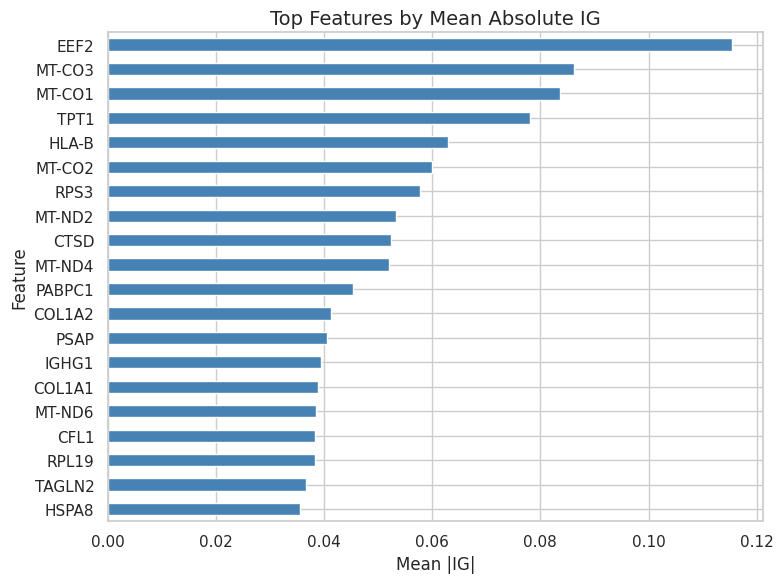

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


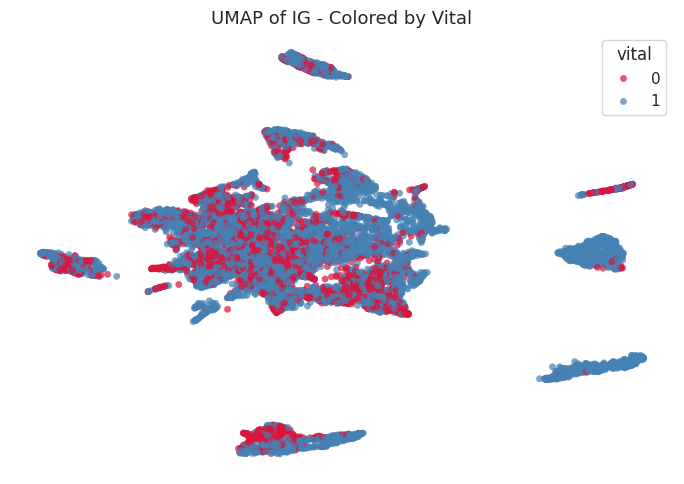

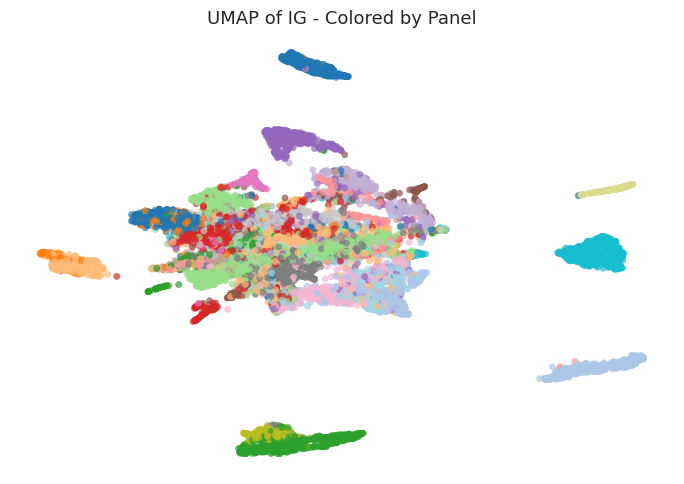

In [ ]:
main_example()

# only xgbooost on activations

<ipython-input-6-f515e05f413a>:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Y = df['vital'].replace({'Alive': 1, 'Dead': 0}).values  # Estado vital (Alive = 1, Dead = 0)


Modelo de la época 499 cargado exitosamente.


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:15:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:15:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:15:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/us

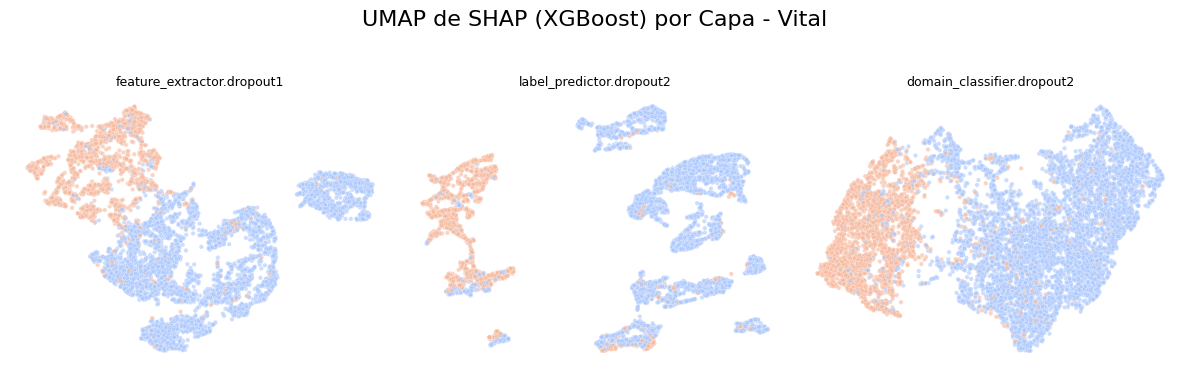

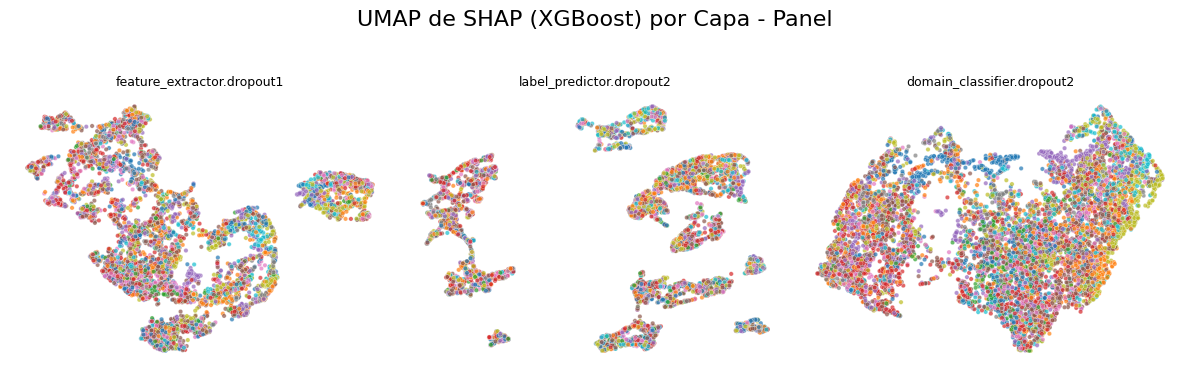

In [ ]:
import os
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import umap.umap_ as umap
import math
from collections import OrderedDict
from sklearn.decomposition import PCA
import xgboost as xgb
import shap

# ====== 1. Cargar modelo y datos ======
epoch_to_load = 499
device = 'cuda'

model, loader = process_model_and_data(df, epoch_to_load, device)
model.eval()

# ====== 2. Preparar tensores de entrada ======
df_features = df.iloc[:, :-2].select_dtypes(include=[np.number]).copy()
df_features = df_features.replace([np.inf, -np.inf], np.nan).fillna(0)
X_tensor = torch.tensor(df_features.values.astype(np.float32)).to(device)

# ====== 3. Función para registrar hooks ======
def register_hooks(model, layers_to_hook):
    activations = OrderedDict()

    def get_hook(name):
        def hook(module, input, output):
            activations[name] = output.detach().cpu().numpy()
        return hook

    handles = []
    for name, layer in layers_to_hook:
        handles.append(layer.register_forward_hook(get_hook(name)))

    return activations, handles

# ====== 4. Definir capas a hookear ======
layers_to_hook = [
    ("feature_extractor.dropout1", model.feature_extractor.dropout1),
    ("label_predictor.dropout2", model.label_predictor.dropout2),
    ("domain_classifier.dropout2", model.domain_classifier.dropout2),
]

# ====== 5. Capturar activaciones ======
activations, handles = register_hooks(model, layers_to_hook)

with torch.no_grad():
    features = model.feature_extractor(X_tensor)
    _ = model.label_predictor(features)
    _ = model.domain_classifier(features)

# Remover hooks
for h in handles:
    h.remove()

# ====== 6. Asegurar que 'vital' esté en formato numérico ======
if df["vital"].dtype == object:
    df["vital"] = df["vital"].map({"Alive": 0, "Dead": 1})

# ====== 7. Calcular SHAP desde activaciones ======
def compute_shap_from_activations(activations, labels):
    shap_dict = OrderedDict()
    for layer, X in activations.items():
        X = X.reshape(X.shape[0], -1)
        model_xgb = xgb.XGBClassifier(   n_estimators=300,
            max_depth=6,
            learning_rate=0.05,
            subsample=0.8,
            colsample_bytree=0.8,
            reg_alpha=1,
            reg_lambda=1,
            random_state=42,
            tree_method='hist',
            device='cuda',
            objective='multi:softprob',
            use_label_encoder=False,
            num_class=2,
            eval_metric='mlogloss'
        )
        model_xgb.fit(X, labels)
        explainer = shap.TreeExplainer(model_xgb)
        shap_vals = explainer.shap_values(X)
        shap_dict[layer] = np.array(shap_vals)
    return shap_dict

shap_vals_dict = compute_shap_from_activations(activations, df["vital"].values)

# ====== 8. Crear UMAP desde SHAP values por capa ======
def create_umap_df_from_shap(shap_dict, df_meta, n_pca=30, n_umap=2, random_state=42):
    all_dfs = []
    for layer, shap_vals in shap_dict.items():
        X = shap_vals.reshape(shap_vals.shape[0], -1)
        pca = PCA(n_components=min(n_pca, X.shape[1]), random_state=random_state).fit_transform(X)
        umap_coords = umap.UMAP(n_components=n_umap, random_state=random_state).fit_transform(pca)
        df_coords = pd.DataFrame(umap_coords, columns=["UMAP1", "UMAP2"])
        df_coords["ID"] = df_meta.index
        df_coords["vital"] = df_meta["vital"].values
        df_coords["panel"] = df_meta["panel"].values
        df_coords["layer"] = layer
        all_dfs.append(df_coords)
    umap_full_df = pd.concat(all_dfs, ignore_index=True)
    return umap_full_df

umap_layer_df = create_umap_df_from_shap(shap_vals_dict, df)

# ====== 9. Guardar resultados ======
umap_layer_df.to_csv("/content/drive/MyDrive/umap_shap_layers_vital.csv", index=False)

# ====== 10. Visualización opcional ======
def plot_umap_by_layer(df_umap, color_col, palette, titulo, cols=3, alpha=0.6):
    layers = df_umap["layer"].unique()
    rows = math.ceil(len(layers) / cols)
    fig, axes = plt.subplots(rows, cols, figsize=(4 * cols, 4 * rows))
    axes = np.ravel(axes)
    fig.suptitle(titulo, fontsize=16, y=0.92)

    for i, layer in enumerate(layers):
        subset = df_umap[df_umap["layer"] == layer]
        sns.scatterplot(data=subset, x="UMAP1", y="UMAP2", hue=color_col,
                        palette=palette, ax=axes[i], s=10, alpha=alpha, legend=False)
        axes[i].set_title(layer, fontsize=9)
        axes[i].axis("off")

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout(rect=[0, 0, 1, 0.88])
    plt.show()

# ====== 11. Visualizar por 'vital' ======
plot_umap_by_layer(umap_layer_df, color_col="vital", palette="coolwarm",
                   titulo="UMAP de SHAP (XGBoost) por Capa - Vital", alpha=0.6)

# ====== 12. Visualizar por 'panel' ======
plot_umap_by_layer(umap_layer_df, color_col="panel", palette="tab10",
                   titulo="UMAP de SHAP (XGBoost) por Capa - Panel", alpha=0.7)


In [ ]:
df["vital"]

9fe7d0f4-866d-490f-b2cb-d9be7da889de    0
dd74434f-300f-4798-8342-aad31b192e12    0
07db9e9d-059d-4e6c-b483-81517a492b96    1
47ee860a-fd18-48f2-bfe7-4e19391950bd    0
e322b0e5-458a-4cbf-a64f-9b348e413939    1
                                       ..
62cb41b1-8960-4fa2-8f74-38dd174af004    1
673a85f3-ba5e-448a-acee-dfec77b5238e    0
3d93b2ae-7730-4914-af23-ff3554752922    0
85a0b88f-2b89-4117-9e04-b81fad7f2e1b    0
a512642f-b720-4efb-a4e9-49b746980809    0
Name: vital, Length: 10286, dtype: int64

In [ ]:
df[vanilla_shap_top300.columns]

0                                         MT-CO1     MT-ND4    MT-RNR2  \
9fe7d0f4-866d-490f-b2cb-d9be7da889de   41.500483  28.967019  15.390633   
dd74434f-300f-4798-8342-aad31b192e12   34.295150  46.239358  31.980887   
07db9e9d-059d-4e6c-b483-81517a492b96   46.007318  35.384683  28.298153   
47ee860a-fd18-48f2-bfe7-4e19391950bd   36.219631  25.180246  33.956314   
e322b0e5-458a-4cbf-a64f-9b348e413939   40.865946  52.533035  27.901233   
...                                          ...        ...        ...   
62cb41b1-8960-4fa2-8f74-38dd174af004   77.154226  79.300876  51.105731   
673a85f3-ba5e-448a-acee-dfec77b5238e   32.892477  38.275971  18.827876   
3d93b2ae-7730-4914-af23-ff3554752922   91.407378  75.003071  95.634543   
85a0b88f-2b89-4117-9e04-b81fad7f2e1b  106.185660  77.585646  51.980321   
a512642f-b720-4efb-a4e9-49b746980809   30.479810  26.808671  11.768231   

0                                        MT-CO3       ACTB     MT-CO2  \
9fe7d0f4-866d-490f-b2cb-d9be7da889de  23.418037   6.932749  31.736383   
dd74434f-300f-4798-8342-aad31b192e12  42.328358  21.239490  38.818135   
07db9e9d-059d-4e6c-b483-81517a492b96  24.900778  50.992305  27.099880   
47ee860a-fd18-48f2-bfe7-4e19391950bd  22.967404   2.803797  14.152815   
e322b0e5-458a-4cbf-a64f-9b348e413939  31.033241  44.605080  31.687227   
...                                         ...        ...        ...   
62cb41b1-8960-4fa2-8f74-38dd174af004  33.190669  24.825719  22.015415   
673a85f3-ba5e-448a-acee-dfec77b5238e  20.132948  18.957334  22.176505   
3d93b2ae-7730-4914-af23-ff3554752922  38.203347  11.340413  34.398727   
85a0b88f-2b89-4117-9e04-b81fad7f2e1b  22.600513  25.042555  29.179273   
a512642f-b720-4efb-a4e9-49b746980809  13.410448   8.071921   8.598060   

0                                        EEF1A1     MT-CYB      ACTG1  \
9fe7d0f4-866d-490f-b2cb-d9be7da889de   4.916372  21.350892   1.816861   
dd74434f-300f-4798-8342-aad31b192e12  33.130806  25.262165  17.150100   
07db9e9d-059d-4e6c-b483-81517a492b96  30.416522  16.751483  19.503358   
47ee860a-fd18-48f2-bfe7-4e19391950bd   2.939256  12.575511   3.007470   
e322b0e5-458a-4cbf-a64f-9b348e413939  17.402863  13.144266  37.080987   
...                                         ...        ...        ...   
62cb41b1-8960-4fa2-8f74-38dd174af004  54.762596  31.408765  11.277169   
673a85f3-ba5e-448a-acee-dfec77b5238e  27.555371  11.084462  28.581100   
3d93b2ae-7730-4914-af23-ff3554752922  11.846951  32.915020   6.139669   
85a0b88f-2b89-4117-9e04-b81fad7f2e1b  32.544035  37.978000  11.999377   
a512642f-b720-4efb-a4e9-49b746980809  12.009282  11.320165   6.803926   

0                                        MT-ND2  ...    MYL12B      HDGF  \
9fe7d0f4-866d-490f-b2cb-d9be7da889de  13.844748  ...  0.999533  1.296707   
dd74434f-300f-4798-8342-aad31b192e12  14.613931  ...  1.925509  1.053753   
07db9e9d-059d-4e6c-b483-81517a492b96  11.176130  ...  2.767991  3.406867   
47ee860a-fd18-48f2-bfe7-4e19391950bd   7.195414  ...  0.578668  0.398960   
e322b0e5-458a-4cbf-a64f-9b348e413939  14.012158  ...  3.715424  4.191426   
...                                         ...  ...       ...       ...   
62cb41b1-8960-4fa2-8f74-38dd174af004  33.610562  ...  1.214936  0.984131   
673a85f3-ba5e-448a-acee-dfec77b5238e  15.037263  ...  0.787223  2.599629   
3d93b2ae-7730-4914-af23-ff3554752922  28.798701  ...  0.292814  0.492963   
85a0b88f-2b89-4117-9e04-b81fad7f2e1b  32.113411  ...  0.719111  0.755227   
a512642f-b720-4efb-a4e9-49b746980809   9.842634  ...  0.807309  0.405315   

0                                         RPN1      KRT7    NUCKS1    TUBB4B  \
9fe7d0f4-866d-490f-b2cb-d9be7da889de  0.992998  0.127516  0.963442  0.411218   
dd74434f-300f-4798-8342-aad31b192e12  2.000159  0.997255  1.113016  2.719490   
07db9e9d-059d-4e6c-b483-81517a492b96  2.645372  0.077516  2.572516  2.124461   
47ee860a-fd18-48f2-bfe7-4e19391950bd  0.623831 -0.057561  0.376766  0.448190   
e322b0e5-458a-4cbf-a64f-9b348e413939  4.3841

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


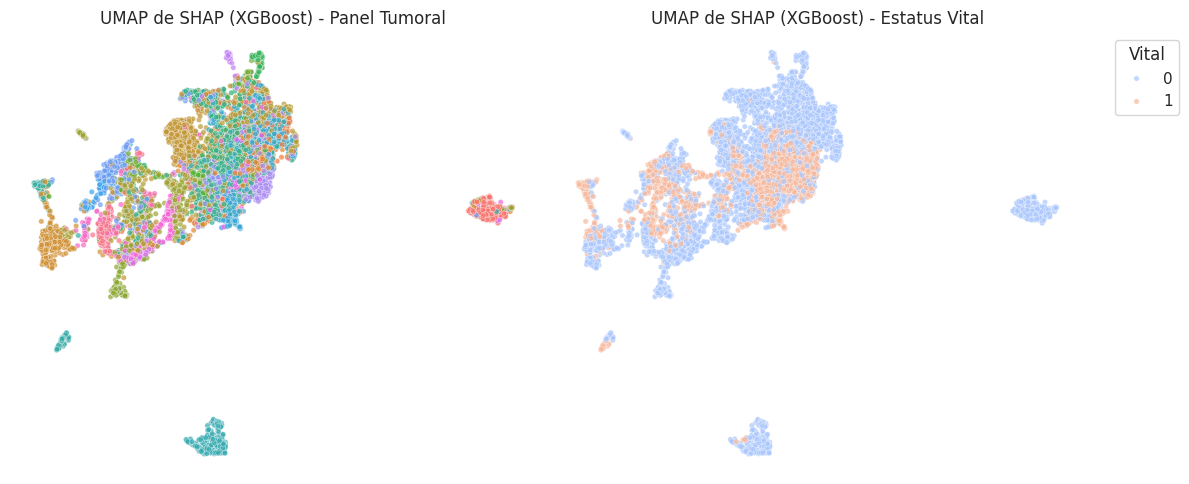

In [ ]:
#this fail la dimensionalidad no es la respuesta!
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import umap
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import shap

# ========== 1. Extraer matriz top 300 columnas ==========
X = df[vanilla_shap_top300.columns].copy()
y = df["vital"] # aseguramos formato binario

# ========== 2. Entrenar modelo XGBoost ==========
model_xgb = xgb.XGBClassifier(
    random_state=42
)
model_xgb.fit(X, y)

# ========== 3. Calcular valores SHAP ==========
explainer = shap.TreeExplainer(model_xgb)
shap_values = explainer.shap_values(X)

# ========== 4. PCA + UMAP sobre SHAP values ==========
pca = PCA(n_components=min(50, X.shape[1]), random_state=42).fit_transform(shap_values)
umap_coords = umap.UMAP(n_components=2, random_state=42).fit_transform(pca)

# ========== 5. DataFrame con UMAP y etiquetas ==========
umap_df = pd.DataFrame(umap_coords, columns=["UMAP1", "UMAP2"], index=X.index)
umap_df["vital"] = df["vital"].values
umap_df["panel"] = df["panel"].values

# ========== 6. Visualización ==========
sns.set(style="white")

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Panel
sns.scatterplot(data=umap_df, x="UMAP1", y="UMAP2", hue="panel", ax=axes[0], s=15, alpha=0.7, legend=False)
axes[0].set_title("UMAP de SHAP (XGBoost) - Panel Tumoral")
axes[0].axis("off")

# Vital
sns.scatterplot(data=umap_df, x="UMAP1", y="UMAP2", hue="vital", palette="coolwarm", ax=axes[1], s=15, alpha=0.7)
axes[1].set_title("UMAP de SHAP (XGBoost) - Estatus Vital")
axes[1].axis("off")
axes[1].legend(title='Vital', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


In [ ]:
df[['vital','panel']]
df.iloc[:,:-2] # sin vital y panel  pero a este solo usaras las columnas de  vanilla_shap_top300.columns no toda la matris de df


vas hacer el  modelo de shap values des los clusters del con su summary para , label_predictor.dropout2  nada mas el input es df.iloc[:,:-2] y vas a predecir vital con xgboost

umap_layer_df #UMAP1	UMAP2	ID 	vital	panel	layer ID es el index aqui sacar el kmedias con k de 10



0                                      5S_rRNA  5_8S_rRNA       7SK      A1BG  \
9fe7d0f4-866d-490f-b2cb-d9be7da889de -0.070030  -0.070030 -0.062088  0.036031   
dd74434f-300f-4798-8342-aad31b192e12 -0.131387  -0.131507  0.018754 -0.130546   
07db9e9d-059d-4e6c-b483-81517a492b96 -0.197439  -0.197439 -0.190100 -0.197081   
47ee860a-fd18-48f2-bfe7-4e19391950bd -0.058225  -0.058225 -0.055153  0.397881   
e322b0e5-458a-4cbf-a64f-9b348e413939 -0.173458  -0.173754 -0.170502 -0.173458   
...                                        ...        ...       ...       ...   
62cb41b1-8960-4fa2-8f74-38dd174af004 -0.150401  -0.150758 -0.144578 -0.149094   
673a85f3-ba5e-448a-acee-dfec77b5238e -0.135007  -0.135346 -0.116271 -0.130831   
3d93b2ae-7730-4914-af23-ff3554752922 -0.092573  -0.092495  0.216627 -0.091793   
85a0b88f-2b89-4117-9e04-b81fad7f2e1b -0.132607  -0.133836  0.020155 -0.120158   
a512642f-b720-4efb-a4e9-49b746980809 -0.064709  -0.064791 -0.060806 -0.063123   

0                                     A1BG-AS1      A1CF        A2M   A2M-AS1  \
9fe7d0f4-866d-490f-b2cb-d9be7da889de -0.068824  0.260822   0.594890 -0.068924   
dd74434f-300f-4798-8342-aad31b192e12 -0.125377 -0.131147   2.814815 -0.124896   
07db9e9d-059d-4e6c-b483-81517a492b96 -0.191174  0.092194   3.602343 -0.192248   
47ee860a-fd18-48f2-bfe7-4e19391950bd -0.049148  0.235994   4.346427 -0.054794   
e322b0e5-458a-4cbf-a64f-9b348e413939 -0.173754 -0.173458   0.933174 -0.171093   
...                                        ...       ...        ...       ...   
62cb41b1-8960-4fa2-8f74-38dd174af004 -0.141725  0.202342  13.042433 -0.139824   
673a85f3-ba5e-448a-acee-dfec77b5238e -0.119319 -0.134894   2.713737 -0.132298   
3d93b2ae-7730-4914-af23-ff3554752922 -0.088358 -0.092339   2.448316 -0.090544   
85a0b88f-2b89-4117-9e04-b81fad7f2e1b -0.092188 -0.133990  -0.083121 -0.119236   
a512642f-b720-4efb-a4e9-49b746980809 -0.058529 -0.064750   1.420914 -0.060440   

0                                        A2ML1  A2ML1-AS1  ...    ZYG11A  \
9fe7d0f4-866d-490f-b2cb-d9be7da889de -0.070030  -0.070030  ... -0.069528   
dd74434f-300f-4798-8342-aad31b192e12 -0.117082  -0.131507  ... -0.122732   
07db9e9d-059d-4e6c-b483-81517a492b96 -0.197260  -0.197439  ... -0.196544   
47ee860a-fd18-48f2-bfe7-4e19391950bd -0.058197  -0.058225  ... -0.056399   
e322b0e5-458a-4cbf-a64f-9b348e413939  0.079621  -0.173754  ... -0.166067   
...                                        ...        ...  ...       ...   
62cb41b1-8960-4fa2-8f74-38dd174af004 -0.150045  -0.150758  ... -0.147430   
673a85f3-ba5e-448a-acee-dfec77b5238e -0.104082  -0.135346  ... -0.115933   
3d93b2ae-7730-4914-af23-ff3554752922 -0.070014  -0.092495  ... -0.092417   
85a0b88f-2b89-4117-9e04-b81fad7f2e1b -0.125537  -0.133990  ... -0.132453   
a512642f-b720-4efb-a4e9-49b746980809 -0.064059  -0.064791  ... -0.056251   

0                                     ZYG11AP1    ZYG11B       ZYX     ZYXP1  \
9fe7d0f4-866d-490f-b2cb-d9be7da889de -0.070030 -0.014034  0.244636 -0.070030   
dd74434f-300f-4798-8342-aad31b192e12 -0.131507 -0.015746  1.144992 -0.131507   
07db9e9d-059d-4e6c-b483-81517a492b96 -0.197439  0.184920  2.271605 -0.197439   
47ee860a-fd18-48f2-bfe7-4e19391950bd -0.058225  0.036333 -0.033679 -0.058225   
e322b0e5-458a-4cbf-a64f-9b348e413939 -0.173754  0.144813  1.811118 -0.173754   
...                                        ...       ...       ...       ...   
62cb41b1-8960-4fa2-8f74-38dd174af004 -0.150758  0.320954  1.168704 -0.150758   
673a85f3-ba5e-448a-acee-dfec77b5238e -0.135346  0.171312  1.518935 -0.135346   
3d93b2ae-7730-4914-af23-ff3554752922 -0.092573  0.107888  0.236532 -0.092573   
85a0b88f-2b89-4117-9e04-b81fad7f2e1b -0.133990  0.113595  2.878835 -0.133990   
a512642f-b720-4efb-a4e9-49b746980809 -0.064791  0.100179  0.269825 -0.064791   

0                                        ZZEF1      ZZZ3  hsa-mir-1253  \
9fe7d0f4-866d-490f-b2cb-d9be7da889de -0.038463 -0.022881     -0.070030   
dd74434f-300f-4798-8342-aad31b19

In [ ]:
import pickle
import os

# Directorio local en Colab
local_dir = "/content/shap_cluster_inputs"
os.makedirs(local_dir, exist_ok=True)

# Guardar cada objeto como .pkl
with open(f"{local_dir}/X.pkl", "wb") as f:
    pickle.dump(X, f)

with open(f"{local_dir}/df.pkl", "wb") as f:
    pickle.dump(df, f)

with open(f"{local_dir}/umap_layer_df.pkl", "wb") as f:
    pickle.dump(umap_layer_df, f)

with open(f"{local_dir}/cluster_labels.pkl", "wb") as f:
    pickle.dump(cluster_labels, f)

print("✅ Archivos guardados exitosamente en /content/shap_cluster_inputs/")


✅ Archivos guardados exitosamente en /content/shap_cluster_inputs/


In [ ]:
import pickle

with open("/content/shap_cluster_inputs/X.pkl", "rb") as f:
    X = pickle.load(f)

with open("/content/shap_cluster_inputs/df.pkl", "rb") as f:
    df = pickle.load(f)

with open("/content/shap_cluster_inputs/umap_layer_df.pkl", "rb") as f:
    umap_layer_df = pickle.load(f)

with open("/content/shap_cluster_inputs/cluster_labels.pkl", "rb") as f:
    cluster_labels = pickle.load(f)


In [ ]:
shap_values.shape

(10286, 39979, 6)

In [ ]:
X

0                                      5S_rRNA  5_8S_rRNA       7SK      A1BG  \
9fe7d0f4-866d-490f-b2cb-d9be7da889de -0.070030  -0.070030 -0.062088  0.036031   
dd74434f-300f-4798-8342-aad31b192e12 -0.131387  -0.131507  0.018754 -0.130546   
07db9e9d-059d-4e6c-b483-81517a492b96 -0.197439  -0.197439 -0.190100 -0.197081   
47ee860a-fd18-48f2-bfe7-4e19391950bd -0.058225  -0.058225 -0.055153  0.397881   
e322b0e5-458a-4cbf-a64f-9b348e413939 -0.173458  -0.173754 -0.170502 -0.173458   
...                                        ...        ...       ...       ...   
62cb41b1-8960-4fa2-8f74-38dd174af004 -0.150401  -0.150758 -0.144578 -0.149094   
673a85f3-ba5e-448a-acee-dfec77b5238e -0.135007  -0.135346 -0.116271 -0.130831   
3d93b2ae-7730-4914-af23-ff3554752922 -0.092573  -0.092495  0.216627 -0.091793   
85a0b88f-2b89-4117-9e04-b81fad7f2e1b -0.132607  -0.133836  0.020155 -0.120158   
a512642f-b720-4efb-a4e9-49b746980809 -0.064709  -0.064791 -0.060806 -0.063123   

0                                     A1BG-AS1      A1CF        A2M   A2M-AS1  \
9fe7d0f4-866d-490f-b2cb-d9be7da889de -0.068824  0.260822   0.594890 -0.068924   
dd74434f-300f-4798-8342-aad31b192e12 -0.125377 -0.131147   2.814815 -0.124896   
07db9e9d-059d-4e6c-b483-81517a492b96 -0.191174  0.092194   3.602343 -0.192248   
47ee860a-fd18-48f2-bfe7-4e19391950bd -0.049148  0.235994   4.346427 -0.054794   
e322b0e5-458a-4cbf-a64f-9b348e413939 -0.173754 -0.173458   0.933174 -0.171093   
...                                        ...       ...        ...       ...   
62cb41b1-8960-4fa2-8f74-38dd174af004 -0.141725  0.202342  13.042433 -0.139824   
673a85f3-ba5e-448a-acee-dfec77b5238e -0.119319 -0.134894   2.713737 -0.132298   
3d93b2ae-7730-4914-af23-ff3554752922 -0.088358 -0.092339   2.448316 -0.090544   
85a0b88f-2b89-4117-9e04-b81fad7f2e1b -0.092188 -0.133990  -0.083121 -0.119236   
a512642f-b720-4efb-a4e9-49b746980809 -0.058529 -0.064750   1.420914 -0.060440   

0                                        A2ML1  A2ML1-AS1  ...    ZYG11A  \
9fe7d0f4-866d-490f-b2cb-d9be7da889de -0.070030  -0.070030  ... -0.069528   
dd74434f-300f-4798-8342-aad31b192e12 -0.117082  -0.131507  ... -0.122732   
07db9e9d-059d-4e6c-b483-81517a492b96 -0.197260  -0.197439  ... -0.196544   
47ee860a-fd18-48f2-bfe7-4e19391950bd -0.058197  -0.058225  ... -0.056399   
e322b0e5-458a-4cbf-a64f-9b348e413939  0.079621  -0.173754  ... -0.166067   
...                                        ...        ...  ...       ...   
62cb41b1-8960-4fa2-8f74-38dd174af004 -0.150045  -0.150758  ... -0.147430   
673a85f3-ba5e-448a-acee-dfec77b5238e -0.104082  -0.135346  ... -0.115933   
3d93b2ae-7730-4914-af23-ff3554752922 -0.070014  -0.092495  ... -0.092417   
85a0b88f-2b89-4117-9e04-b81fad7f2e1b -0.125537  -0.133990  ... -0.132453   
a512642f-b720-4efb-a4e9-49b746980809 -0.064059  -0.064791  ... -0.056251   

0                                     ZYG11AP1    ZYG11B       ZYX     ZYXP1  \
9fe7d0f4-866d-490f-b2cb-d9be7da889de -0.070030 -0.014034  0.244636 -0.070030   
dd74434f-300f-4798-8342-aad31b192e12 -0.131507 -0.015746  1.144992 -0.131507   
07db9e9d-059d-4e6c-b483-81517a492b96 -0.197439  0.184920  2.271605 -0.197439   
47ee860a-fd18-48f2-bfe7-4e19391950bd -0.058225  0.036333 -0.033679 -0.058225   
e322b0e5-458a-4cbf-a64f-9b348e413939 -0.173754  0.144813  1.811118 -0.173754   
...                                        ...       ...       ...       ...   
62cb41b1-8960-4fa2-8f74-38dd174af004 -0.150758  0.320954  1.168704 -0.150758   
673a85f3-ba5e-448a-acee-dfec77b5238e -0.135346  0.171312  1.518935 -0.135346   
3d93b2ae-7730-4914-af23-ff3554752922 -0.092573  0.107888  0.236532 -0.092573   
85a0b88f-2b89-4117-9e04-b81fad7f2e1b -0.133990  0.113595  2.878835 -0.133990   
a512642f-b720-4efb-a4e9-49b746980809 -0.064791  0.100179  0.269825 -0.064791   

0                                        ZZEF1      ZZZ3  hsa-mir-1253  \
9fe7d0f4-866d-490f-b2cb-d9be7da889de -0.038463 -0.022881     -0.070030   
dd74434f-300f-4798-8342-aad31b19

In [ ]:
!pip install leidenalg igraph


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 79.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 103.4 MB/s eta 0:00:00


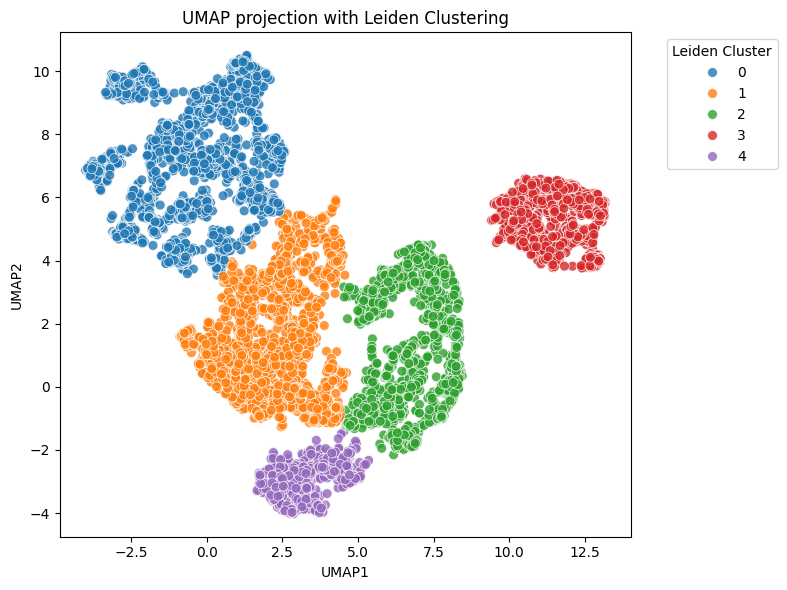

In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
import igraph as ig
import leidenalg
from sklearn.neighbors import kneighbors_graph
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# 1) Feature matrix
X = df.iloc[:, :-2].copy()
vital_status = df.iloc[:, -2]

# 2) UMAP-based cluster assignment
layer_name = "feature_extractor.dropout1"
umap_filtered = umap_layer_df[umap_layer_df["layer"] == layer_name].copy()

# 2.1) Extraer coordenadas UMAP
umap_coords = umap_filtered.set_index("ID").loc[X.index][["UMAP1", "UMAP2"]]

# 2.2) Construir grafo de vecinos con sklearn
knn_graph = kneighbors_graph(umap_coords, n_neighbors=400, include_self=False)
sources, targets = knn_graph.nonzero()
edges = list(zip(sources.tolist(), targets.tolist()))

# 2.3) Crear grafo igraph
G = ig.Graph(edges=edges, directed=False)

# 2.4) Ejecutar Leiden
partition = leidenalg.find_partition(G, leidenalg.RBConfigurationVertexPartition, resolution_parameter=0.3)
clusters = np.array(partition.membership)

# 2.5) Guardar clusters
umap_filtered = umap_filtered.set_index("ID").loc[X.index]
umap_filtered["cluster"] = clusters


# 8) UMAP visualization with Leiden clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=umap_filtered["UMAP1"],
    y=umap_filtered["UMAP2"],
    hue=umap_filtered["cluster"],
    palette="tab10",
    s=50,
    alpha=0.8
)
plt.title("UMAP projection with Leiden Clustering")
plt.xlabel("UMAP1")
plt.ylabel("UMAP2")
plt.legend(title="Leiden Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



# 3) Alinear clusters con X
cluster_labels = umap_filtered["cluster"]





In [ ]:
import pickle
import pandas as pd

# Ruta al archivo .pkl
path = '/content/drive/MyDrive/umap_filtered.pkl'  # Ajusta si estás en otro lugar

# Cargar el pickle
with open(path, 'rb') as f:
    umap_filtered = pickle.load(f)

# Guardar como CSV
csv_path = '/content/drive/MyDrive/umap_filtered.csv'  # Cambia la ruta si quieres
if isinstance(umap_filtered, pd.DataFrame):
    umap_filtered.to_csv(csv_path, index=False)
    print("Archivo guardado exitosamente como CSV:", csv_path)
else:
    print("El objeto no es un DataFrame. Tipo:", type(umap_filtered))


Archivo guardado exitosamente como CSV: /content/drive/MyDrive/umap_filtered.csv


In [ ]:
import pickle
import pandas as pd

# Ruta al archivo .pkl
path = '/content/umap_filtered.pkl'  # Ajusta si estás en otro lugar

# Cargar el pickle
with open(path, 'rb') as f:
    umap_filtered = pickle.load(f)

# Guardar como CSV
csv_path = '/content/umap_filtered.csv'  # Cambia la ruta si quieres
if isinstance(umap_filtered, pd.DataFrame):
    umap_filtered.to_csv(csv_path, index=False)
    print("Archivo guardado exitosamente como CSV:", csv_path)
else:
    print("El objeto no es un DataFrame. Tipo:", type(umap_filtered))


Archivo guardado exitosamente como CSV: /content/umap_filtered.csv


In [ ]:
import pickle

# Ruta de ejemplo en Google Drive
path = '/content/umap_filtered.pkl'

with open(path, 'wb') as f:
    pickle.dump(umap_filtered, f)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:17:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:18:38] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)


Confusion Matrix:
 [[589 177  47  41  21]
 [258 549  80  28  47]
 [121  65 359  39  14]
 [ 48  23  50 212  18]
 [ 49  58  13   1 179]]

Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.67      0.61       875
           1       0.63      0.57      0.60       962
           2       0.65      0.60      0.63       598
           3       0.66      0.60      0.63       351
           4       0.64      0.60      0.62       300

    accuracy                           0.61      3086
   macro avg       0.63      0.61      0.62      3086
weighted avg       0.62      0.61      0.61      3086



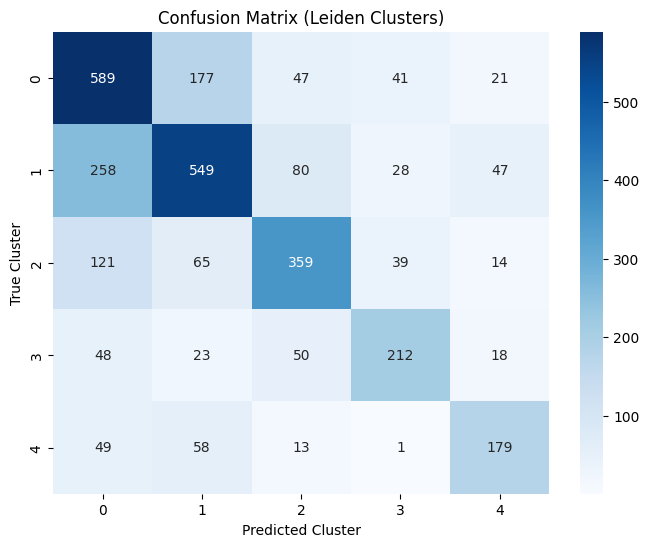

In [ ]:
# 4) Stratified train/test split by vital_status
X_train, X_test, y_train, y_test = train_test_split(
    X,
    cluster_labels,
    test_size=0.3,
    random_state=42,
    stratify=vital_status
)

# 5) XGBoost multi-class classifier
model_xgb = xgb.XGBClassifier(
    tree_method='hist',
    device='cuda',
    random_state=42,
    objective='multi:softprob',
    num_class=len(np.unique(clusters)),
    n_estimators=100,
    max_depth=7,

    eval_metric='mlogloss',
    use_label_encoder=False
)
model_xgb.fit(X_train, y_train)

# 6) Prediction and evaluation
y_pred = model_xgb.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Classification report
cr = classification_report(y_test, y_pred)
print("\nClassification Report:\n", cr)

# 7) Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix (Leiden Clusters)")
plt.xlabel("Predicted Cluster")
plt.ylabel("True Cluster")
plt.show()

Confusion Matrix:
 [[589 177  47  41  21]
 [258 549  80  28  47]
 [121  65 359  39  14]
 [ 48  23  50 212  18]
 [ 49  58  13   1 179]]

Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.67      0.61       875
           1       0.63      0.57      0.60       962
           2       0.65      0.60      0.63       598
           3       0.66      0.60      0.63       351
           4       0.64      0.60      0.62       300

    accuracy                           0.61      3086
   macro avg       0.63      0.61      0.62      3086
weighted avg       0.62      0.61      0.61      3086



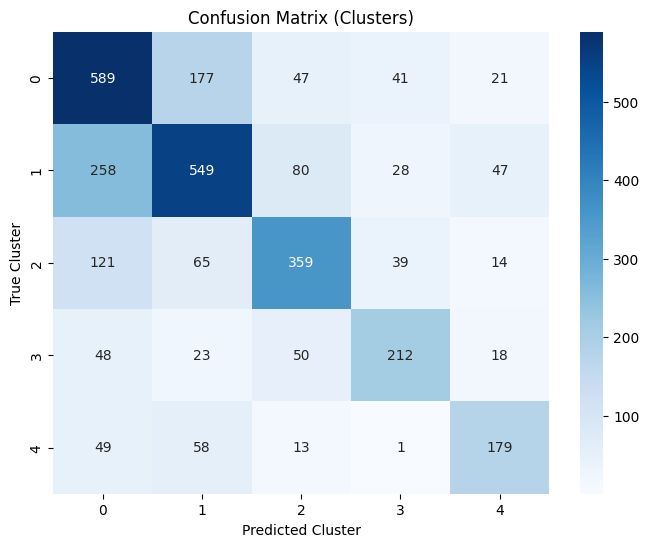

In [ ]:
# 5) Predicciones y métricas
y_pred = model_xgb.predict(X_test)

# Confusion matrix (numeric)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Classification report
cr = classification_report(y_test, y_pred)
print("\nClassification Report:\n", cr)

# Optional: visualize the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix (Clusters)")
plt.xlabel("Predicted Cluster")
plt.ylabel("True Cluster")
plt.show()

In [ ]:
!pip install adjustText


In [ ]:
X

0                                      5S_rRNA  5_8S_rRNA       7SK      A1BG  \
9fe7d0f4-866d-490f-b2cb-d9be7da889de -0.070030  -0.070030 -0.062088  0.036031   
dd74434f-300f-4798-8342-aad31b192e12 -0.131387  -0.131507  0.018754 -0.130546   
07db9e9d-059d-4e6c-b483-81517a492b96 -0.197439  -0.197439 -0.190100 -0.197081   
47ee860a-fd18-48f2-bfe7-4e19391950bd -0.058225  -0.058225 -0.055153  0.397881   
e322b0e5-458a-4cbf-a64f-9b348e413939 -0.173458  -0.173754 -0.170502 -0.173458   
...                                        ...        ...       ...       ...   
62cb41b1-8960-4fa2-8f74-38dd174af004 -0.150401  -0.150758 -0.144578 -0.149094   
673a85f3-ba5e-448a-acee-dfec77b5238e -0.135007  -0.135346 -0.116271 -0.130831   
3d93b2ae-7730-4914-af23-ff3554752922 -0.092573  -0.092495  0.216627 -0.091793   
85a0b88f-2b89-4117-9e04-b81fad7f2e1b -0.132607  -0.133836  0.020155 -0.120158   
a512642f-b720-4efb-a4e9-49b746980809 -0.064709  -0.064791 -0.060806 -0.063123   

0                                     A1BG-AS1      A1CF        A2M   A2M-AS1  \
9fe7d0f4-866d-490f-b2cb-d9be7da889de -0.068824  0.260822   0.594890 -0.068924   
dd74434f-300f-4798-8342-aad31b192e12 -0.125377 -0.131147   2.814815 -0.124896   
07db9e9d-059d-4e6c-b483-81517a492b96 -0.191174  0.092194   3.602343 -0.192248   
47ee860a-fd18-48f2-bfe7-4e19391950bd -0.049148  0.235994   4.346427 -0.054794   
e322b0e5-458a-4cbf-a64f-9b348e413939 -0.173754 -0.173458   0.933174 -0.171093   
...                                        ...       ...        ...       ...   
62cb41b1-8960-4fa2-8f74-38dd174af004 -0.141725  0.202342  13.042433 -0.139824   
673a85f3-ba5e-448a-acee-dfec77b5238e -0.119319 -0.134894   2.713737 -0.132298   
3d93b2ae-7730-4914-af23-ff3554752922 -0.088358 -0.092339   2.448316 -0.090544   
85a0b88f-2b89-4117-9e04-b81fad7f2e1b -0.092188 -0.133990  -0.083121 -0.119236   
a512642f-b720-4efb-a4e9-49b746980809 -0.058529 -0.064750   1.420914 -0.060440   

0                                        A2ML1  A2ML1-AS1  ...    ZYG11A  \
9fe7d0f4-866d-490f-b2cb-d9be7da889de -0.070030  -0.070030  ... -0.069528   
dd74434f-300f-4798-8342-aad31b192e12 -0.117082  -0.131507  ... -0.122732   
07db9e9d-059d-4e6c-b483-81517a492b96 -0.197260  -0.197439  ... -0.196544   
47ee860a-fd18-48f2-bfe7-4e19391950bd -0.058197  -0.058225  ... -0.056399   
e322b0e5-458a-4cbf-a64f-9b348e413939  0.079621  -0.173754  ... -0.166067   
...                                        ...        ...  ...       ...   
62cb41b1-8960-4fa2-8f74-38dd174af004 -0.150045  -0.150758  ... -0.147430   
673a85f3-ba5e-448a-acee-dfec77b5238e -0.104082  -0.135346  ... -0.115933   
3d93b2ae-7730-4914-af23-ff3554752922 -0.070014  -0.092495  ... -0.092417   
85a0b88f-2b89-4117-9e04-b81fad7f2e1b -0.125537  -0.133990  ... -0.132453   
a512642f-b720-4efb-a4e9-49b746980809 -0.064059  -0.064791  ... -0.056251   

0                                     ZYG11AP1    ZYG11B       ZYX     ZYXP1  \
9fe7d0f4-866d-490f-b2cb-d9be7da889de -0.070030 -0.014034  0.244636 -0.070030   
dd74434f-300f-4798-8342-aad31b192e12 -0.131507 -0.015746  1.144992 -0.131507   
07db9e9d-059d-4e6c-b483-81517a492b96 -0.197439  0.184920  2.271605 -0.197439   
47ee860a-fd18-48f2-bfe7-4e19391950bd -0.058225  0.036333 -0.033679 -0.058225   
e322b0e5-458a-4cbf-a64f-9b348e413939 -0.173754  0.144813  1.811118 -0.173754   
...                                        ...       ...       ...       ...   
62cb41b1-8960-4fa2-8f74-38dd174af004 -0.150758  0.320954  1.168704 -0.150758   
673a85f3-ba5e-448a-acee-dfec77b5238e -0.135346  0.171312  1.518935 -0.135346   
3d93b2ae-7730-4914-af23-ff3554752922 -0.092573  0.107888  0.236532 -0.092573   
85a0b88f-2b89-4117-9e04-b81fad7f2e1b -0.133990  0.113595  2.878835 -0.133990   
a512642f-b720-4efb-a4e9-49b746980809 -0.064791  0.100179  0.269825 -0.064791   

0                                        ZZEF1      ZZZ3  hsa-mir-1253  \
9fe7d0f4-866d-490f-b2cb-d9be7da889de -0.038463 -0.022881     -0.070030   
dd74434f-300f-4798-8342-aad31b19

In [ ]:
X[GENE]

9fe7d0f4-866d-490f-b2cb-d9be7da889de     2.034111
dd74434f-300f-4798-8342-aad31b192e12    11.426709
07db9e9d-059d-4e6c-b483-81517a492b96     7.374021
47ee860a-fd18-48f2-bfe7-4e19391950bd     0.566437
e322b0e5-458a-4cbf-a64f-9b348e413939     4.433862
                                          ...    
62cb41b1-8960-4fa2-8f74-38dd174af004     3.467006
673a85f3-ba5e-448a-acee-dfec77b5238e     7.976577
3d93b2ae-7730-4914-af23-ff3554752922     1.719381
85a0b88f-2b89-4117-9e04-b81fad7f2e1b     5.708622
a512642f-b720-4efb-a4e9-49b746980809     1.507364
Name: RPS3, Length: 10286, dtype: float64

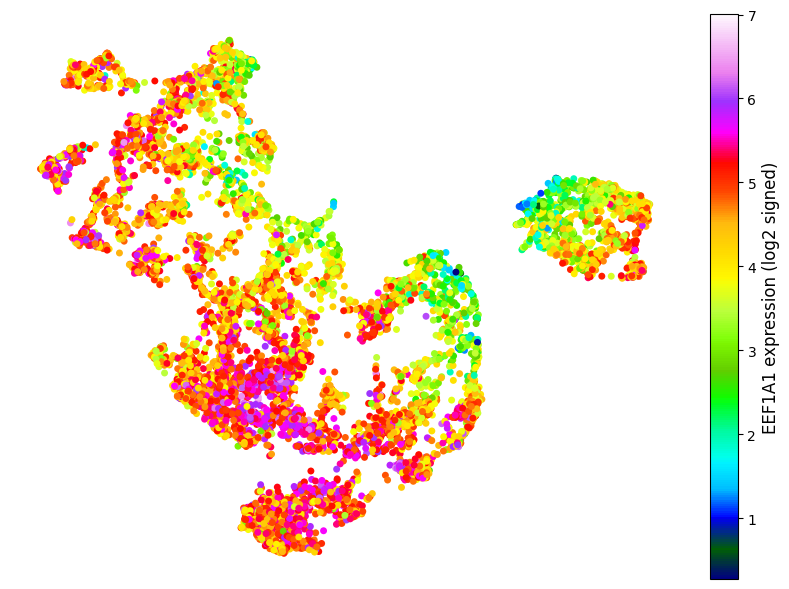

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

GENE = "EEF1A1"

# Validación
if GENE not in X.columns:
    raise ValueError(f"{GENE} not found in X")

# Transformación logarítmica simétrica
def log_signed(x):
    return np.sign(x) * np.log2(1 + np.abs(x))

# Aplicar la transformación
umap_filtered[f"{GENE}_log"] = log_signed(X[GENE].values)

# Visualización
plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    umap_filtered["UMAP1"],
    umap_filtered["UMAP2"],
    c=umap_filtered[f"{GENE}_log"],
    cmap="gist_ncar",
    s=25,
    edgecolors='none'
)

ax = plt.gca()
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_facecolor("white")
for spine in ['top', 'right', 'left', 'bottom']:
    ax.spines[spine].set_visible(False)

# Colorbar
cbar = plt.colorbar(scatter, ax=ax, fraction=0.046, pad=0.04)
cbar.set_label(f"{GENE} expression (log2 signed)", fontsize=12)

plt.tight_layout()
plt.show()



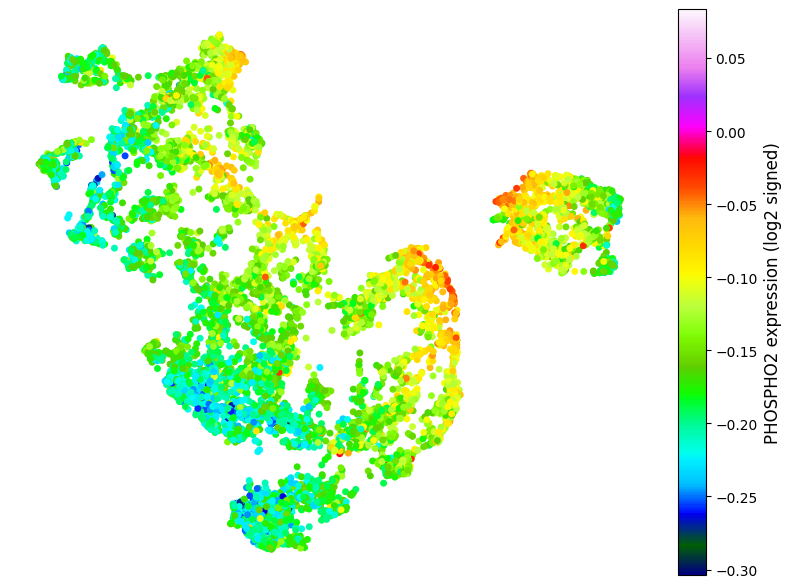

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

GENE = "PHOSPHO2"

# Validación
if GENE not in X.columns:
    raise ValueError(f"{GENE} not found in X")

# Transformación logarítmica simétrica
def log_signed(x):
    return np.sign(x) * np.log2(1 + np.abs(x))

# Aplicar la transformación
umap_filtered[f"{GENE}_log"] = log_signed(X[GENE].values)

# Visualización
plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    umap_filtered["UMAP1"],
    umap_filtered["UMAP2"],
    c=umap_filtered[f"{GENE}_log"],
    cmap="gist_ncar",
    s=25,
    edgecolors='none'
)

ax = plt.gca()
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_facecolor("white")
for spine in ['top', 'right', 'left', 'bottom']:
    ax.spines[spine].set_visible(False)

# Colorbar
cbar = plt.colorbar(scatter, ax=ax, fraction=0.046, pad=0.04)
cbar.set_label(f"{GENE} expression (log2 signed)", fontsize=12)

plt.tight_layout()
plt.show()



<ipython-input-12-34ac5952afc0>:4: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.scatterplot(


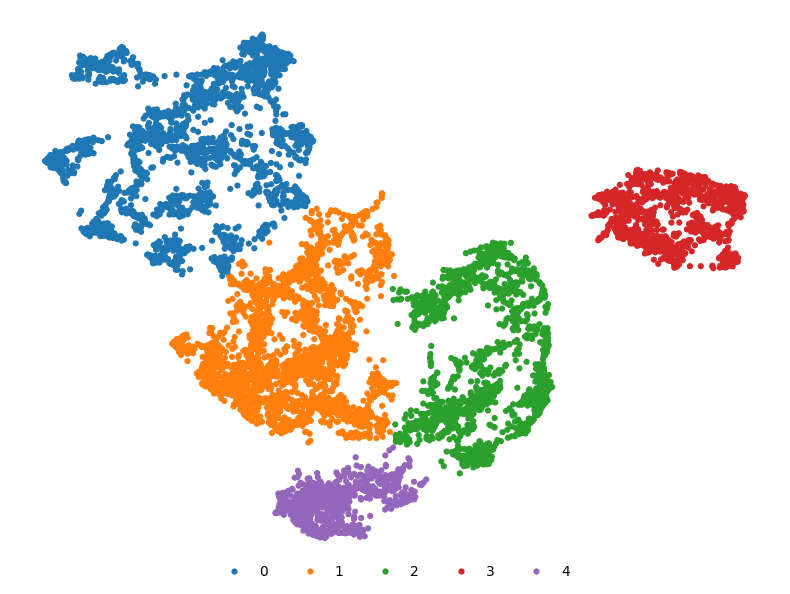

In [ ]:
plt.figure(figsize=(8, 6))
palette = sns.color_palette("tab10", n_colors=10)

sns.scatterplot(
    data=umap_filtered,
    x="UMAP1",
    y="UMAP2",
    hue="cluster",
    palette=palette,
    s=20,
    edgecolor="none",
    linewidth=0
)

ax = plt.gca()
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_facecolor("white")
ax.spines[['top', 'right', 'left', 'bottom']].set_visible(False)

plt.legend(title="", loc="lower center", bbox_to_anchor=(0.5, -0.05), ncol=5, frameon=False)
plt.tight_layout()
plt.show()


<ipython-input-13-83d5abc7bef9>:4: UserWarning: 
The palette list has fewer values (10) than needed (33) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(


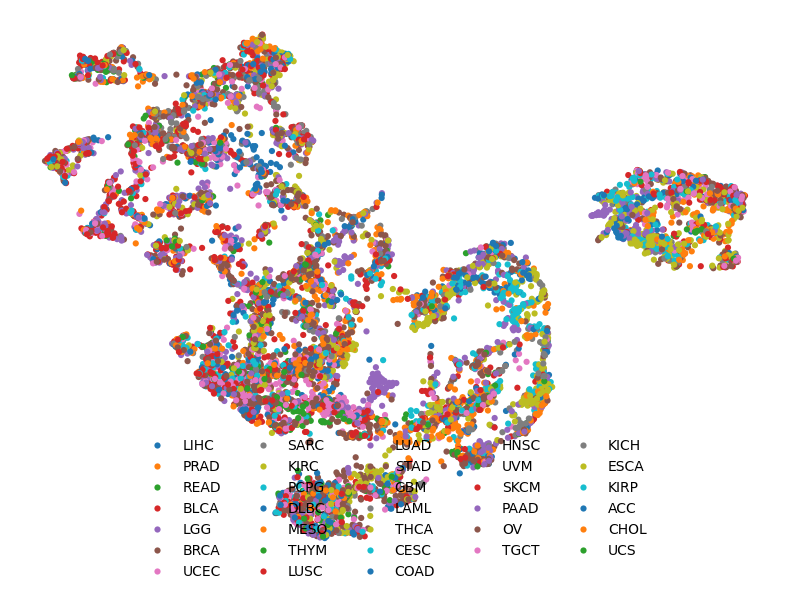

In [ ]:
plt.figure(figsize=(8, 6))
palette = sns.color_palette("tab10", n_colors=10)

sns.scatterplot(
    data=umap_filtered,
    x="UMAP1",
    y="UMAP2",
    hue="panel",
    palette=palette,
    s=20,
    edgecolor="none",
    linewidth=0
)

ax = plt.gca()
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_facecolor("white")
ax.spines[['top', 'right', 'left', 'bottom']].set_visible(False)

plt.legend(title="", loc="lower center", bbox_to_anchor=(0.5, -0.05), ncol=5, frameon=False)
plt.tight_layout()
plt.show()


In [ ]:
umap_filtered

UMAP1     UMAP2  vital panel  \
9fe7d0f4-866d-490f-b2cb-d9be7da889de   6.557655  3.385943      0  LIHC   
dd74434f-300f-4798-8342-aad31b192e12   7.962501 -0.641541      0  PRAD   
07db9e9d-059d-4e6c-b483-81517a492b96  -2.865412  4.887942      1  READ   
47ee860a-fd18-48f2-bfe7-4e19391950bd   7.158089  3.003931      0  LIHC   
e322b0e5-458a-4cbf-a64f-9b348e413939  -1.025073  8.229523      1  BLCA   
...                                         ...       ...    ...   ...   
62cb41b1-8960-4fa2-8f74-38dd174af004  -1.278555  4.418131      1  KIRC   
673a85f3-ba5e-448a-acee-dfec77b5238e   1.336122  3.364409      0   UCS   
3d93b2ae-7730-4914-af23-ff3554752922  10.398424  5.538455      0   LGG   
85a0b88f-2b89-4117-9e04-b81fad7f2e1b   3.033451  1.225245      0  LAML   
a512642f-b720-4efb-a4e9-49b746980809   7.541450  3.351604      0  THCA   

                                                           layer  cluster  \
9fe7d0f4-866d-490f-b2cb-d9be7da889de  feature_extractor.dropout1        2   
dd74434f-300f-4798-8342-aad31b192e12  feature_extractor.dropout1        2   
07db9e9d-059d-4e6c-b483-81517a492b96  feature_extractor.dropout1        0   
47ee860a-fd18-48f2-bfe7-4e19391950bd  feature_extractor.dropout1        2   
e322b0e5-458a-4cbf-a64f-9b348e413939  feature_extractor.dropout1        0   
...                                                          ...      ...   
62cb41b1-8960-4fa2-8f74-38dd174af004  feature_extractor.dropout1        0   
673a85f3-ba5e-448a-acee-dfec77b5238e  feature_extractor.dropout1        1   
3d93b2ae-7730-4914-af23-ff3554752922  feature_extractor.dropout1        3   
85a0b88f-2b89-4117-9e04-b81fad7f2e1b  feature_extractor.dropout1        1   
a512642f-b720-4efb-a4e9-49b746980809  feature_extractor.dropout1        2   

                                      EEF1A1_log  PHOSPHO2_log estado  
9fe7d0f4-866d-490f-b2cb-d9be7da889de    2.564713     -0.093851  Alive  
dd74434f-300f-4798-8342-aad31b192e12    5.093003     -0.098530  Alive  
07db9e9d-059d-4e6c-b483-81517a492b96    4.973452     -0.218160   Dead  
47ee860a-fd18-48f2-bfe7-4e19391950bd    1.977923     -0.080137  Alive  
e322b0e5-458a-4cbf-a64f-9b348e413939    4.201858     -0.223844   Dead  
...                                          ...           ...    ...  
62cb41b1-8960-4fa2-8f74-38dd174af004    5.801226     -0.188510   Dead  
673a85f3-ba5e-448a-acee-dfec77b5238e    4.835690     -0.173057  Alive  
3d93b2ae-7730-4914-af23-ff3554752922    3.683354     -0.118008  Alive  
85a0b88f-2b89-4117-9e04-b81fad7f2e1b    5.067984     -0.153174  Alive  
a512642f-b720-4efb-a4e9-49b746980809    3.701469     -0.077231  Alive  

[10286 rows x 9 columns]

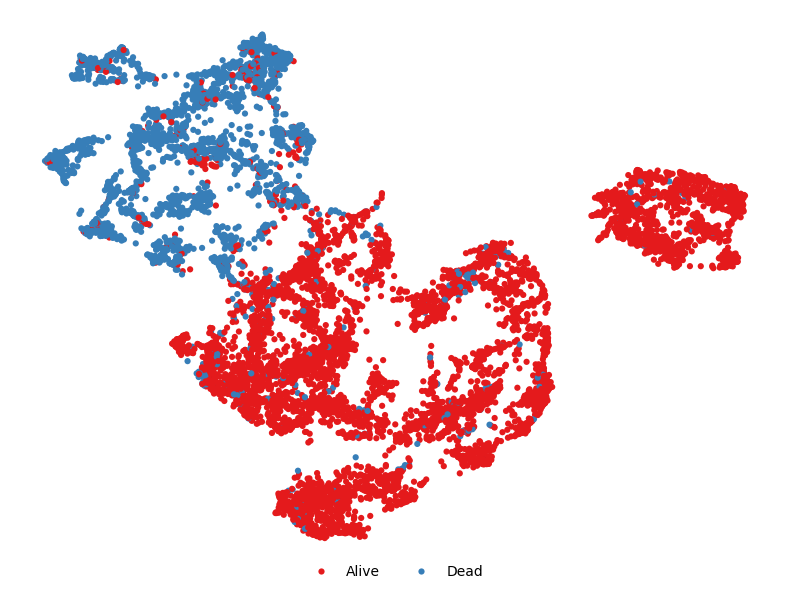

In [ ]:
plt.figure(figsize=(8, 6))

# Mapea los valores: 0 = Muerto, 1 = Vivo (ajusta si están al revés)
umap_filtered["estado"] = umap_filtered["vital"].map({0: "Alive", 1: "Dead"})

palette = sns.color_palette("Set1", n_colors=2)

sns.scatterplot(
    data=umap_filtered,
    x="UMAP1",
    y="UMAP2",
    hue="estado",
    palette=palette,
    s=20,
    edgecolor="none",
    linewidth=0
)

ax = plt.gca()
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_facecolor("white")
ax.spines[['top', 'right', 'left', 'bottom']].set_visible(False)

plt.legend(title="", loc="lower center", bbox_to_anchor=(0.5, -0.05), ncol=2, frameon=False)
plt.tight_layout()
plt.show()



In [ ]:
umap_filtered

UMAP1     UMAP2  vital panel  \
9fe7d0f4-866d-490f-b2cb-d9be7da889de   6.557655  3.385943      0  LIHC   
dd74434f-300f-4798-8342-aad31b192e12   7.962501 -0.641541      0  PRAD   
07db9e9d-059d-4e6c-b483-81517a492b96  -2.865412  4.887942      1  READ   
47ee860a-fd18-48f2-bfe7-4e19391950bd   7.158089  3.003931      0  LIHC   
e322b0e5-458a-4cbf-a64f-9b348e413939  -1.025073  8.229523      1  BLCA   
...                                         ...       ...    ...   ...   
62cb41b1-8960-4fa2-8f74-38dd174af004  -1.278555  4.418131      1  KIRC   
673a85f3-ba5e-448a-acee-dfec77b5238e   1.336122  3.364409      0   UCS   
3d93b2ae-7730-4914-af23-ff3554752922  10.398424  5.538455      0   LGG   
85a0b88f-2b89-4117-9e04-b81fad7f2e1b   3.033451  1.225245      0  LAML   
a512642f-b720-4efb-a4e9-49b746980809   7.541450  3.351604      0  THCA   

                                                           layer  cluster  \
9fe7d0f4-866d-490f-b2cb-d9be7da889de  feature_extractor.dropout1        2   
dd74434f-300f-4798-8342-aad31b192e12  feature_extractor.dropout1        2   
07db9e9d-059d-4e6c-b483-81517a492b96  feature_extractor.dropout1        0   
47ee860a-fd18-48f2-bfe7-4e19391950bd  feature_extractor.dropout1        2   
e322b0e5-458a-4cbf-a64f-9b348e413939  feature_extractor.dropout1        0   
...                                                          ...      ...   
62cb41b1-8960-4fa2-8f74-38dd174af004  feature_extractor.dropout1        0   
673a85f3-ba5e-448a-acee-dfec77b5238e  feature_extractor.dropout1        1   
3d93b2ae-7730-4914-af23-ff3554752922  feature_extractor.dropout1        3   
85a0b88f-2b89-4117-9e04-b81fad7f2e1b  feature_extractor.dropout1        1   
a512642f-b720-4efb-a4e9-49b746980809  feature_extractor.dropout1        2   

                                     estado   VIM_log  
9fe7d0f4-866d-490f-b2cb-d9be7da889de  Alive  0.536276  
dd74434f-300f-4798-8342-aad31b192e12  Alive  1.768581  
07db9e9d-059d-4e6c-b483-81517a492b96   Dead  2.031225  
47ee860a-fd18-48f2-bfe7-4e19391950bd  Alive  0.185839  
e322b0e5-458a-4cbf-a64f-9b348e413939   Dead  0.418667  
...                                     ...       ...  
62cb41b1-8960-4fa2-8f74-38dd174af004   Dead  4.660736  
673a85f3-ba5e-448a-acee-dfec77b5238e  Alive  3.079539  
3d93b2ae-7730-4914-af23-ff3554752922  Alive  0.537635  
85a0b88f-2b89-4117-9e04-b81fad7f2e1b  Alive  3.603318  
a512642f-b720-4efb-a4e9-49b746980809  Alive  2.303284  

[10286 rows x 8 columns]

In [ ]:
from sklearn.model_selection import train_test_split

# 1. Supongamos que tu DataFrame original es `df` y contiene X + columnas "vital" y "panel"
X = df.iloc[:, :-2].copy()
vital = df["vital"]
panel = df["panel"]

# 2. Etiquetas de cluster (asignadas antes)
# umap_filtered ya tiene el clustering hecho, así que usamos eso:
cluster_labels = umap_filtered.loc[X.index]["cluster"]

# 3. Hacemos un muestreo estratificado basado en los clusters
X_sample, _, idx_sample, _ = train_test_split(
    X,
    X.index,
    test_size=0.5,  # conservamos 10%
    stratify=cluster_labels,
    random_state=42
)

# 4. Usamos el índice seleccionado para tomar también "vital" y "panel"
X_sample = X.loc[idx_sample]
cluster_sample = cluster_labels.loc[idx_sample]
vital_sample = vital.loc[idx_sample]
panel_sample = panel.loc[idx_sample]


In [ ]:
explainer = shap.TreeExplainer(model_xgb, approximate=True)
shap_values = explainer.shap_values(X_sample)


In [ ]:
shap_values.shape

(5143, 39979, 5)

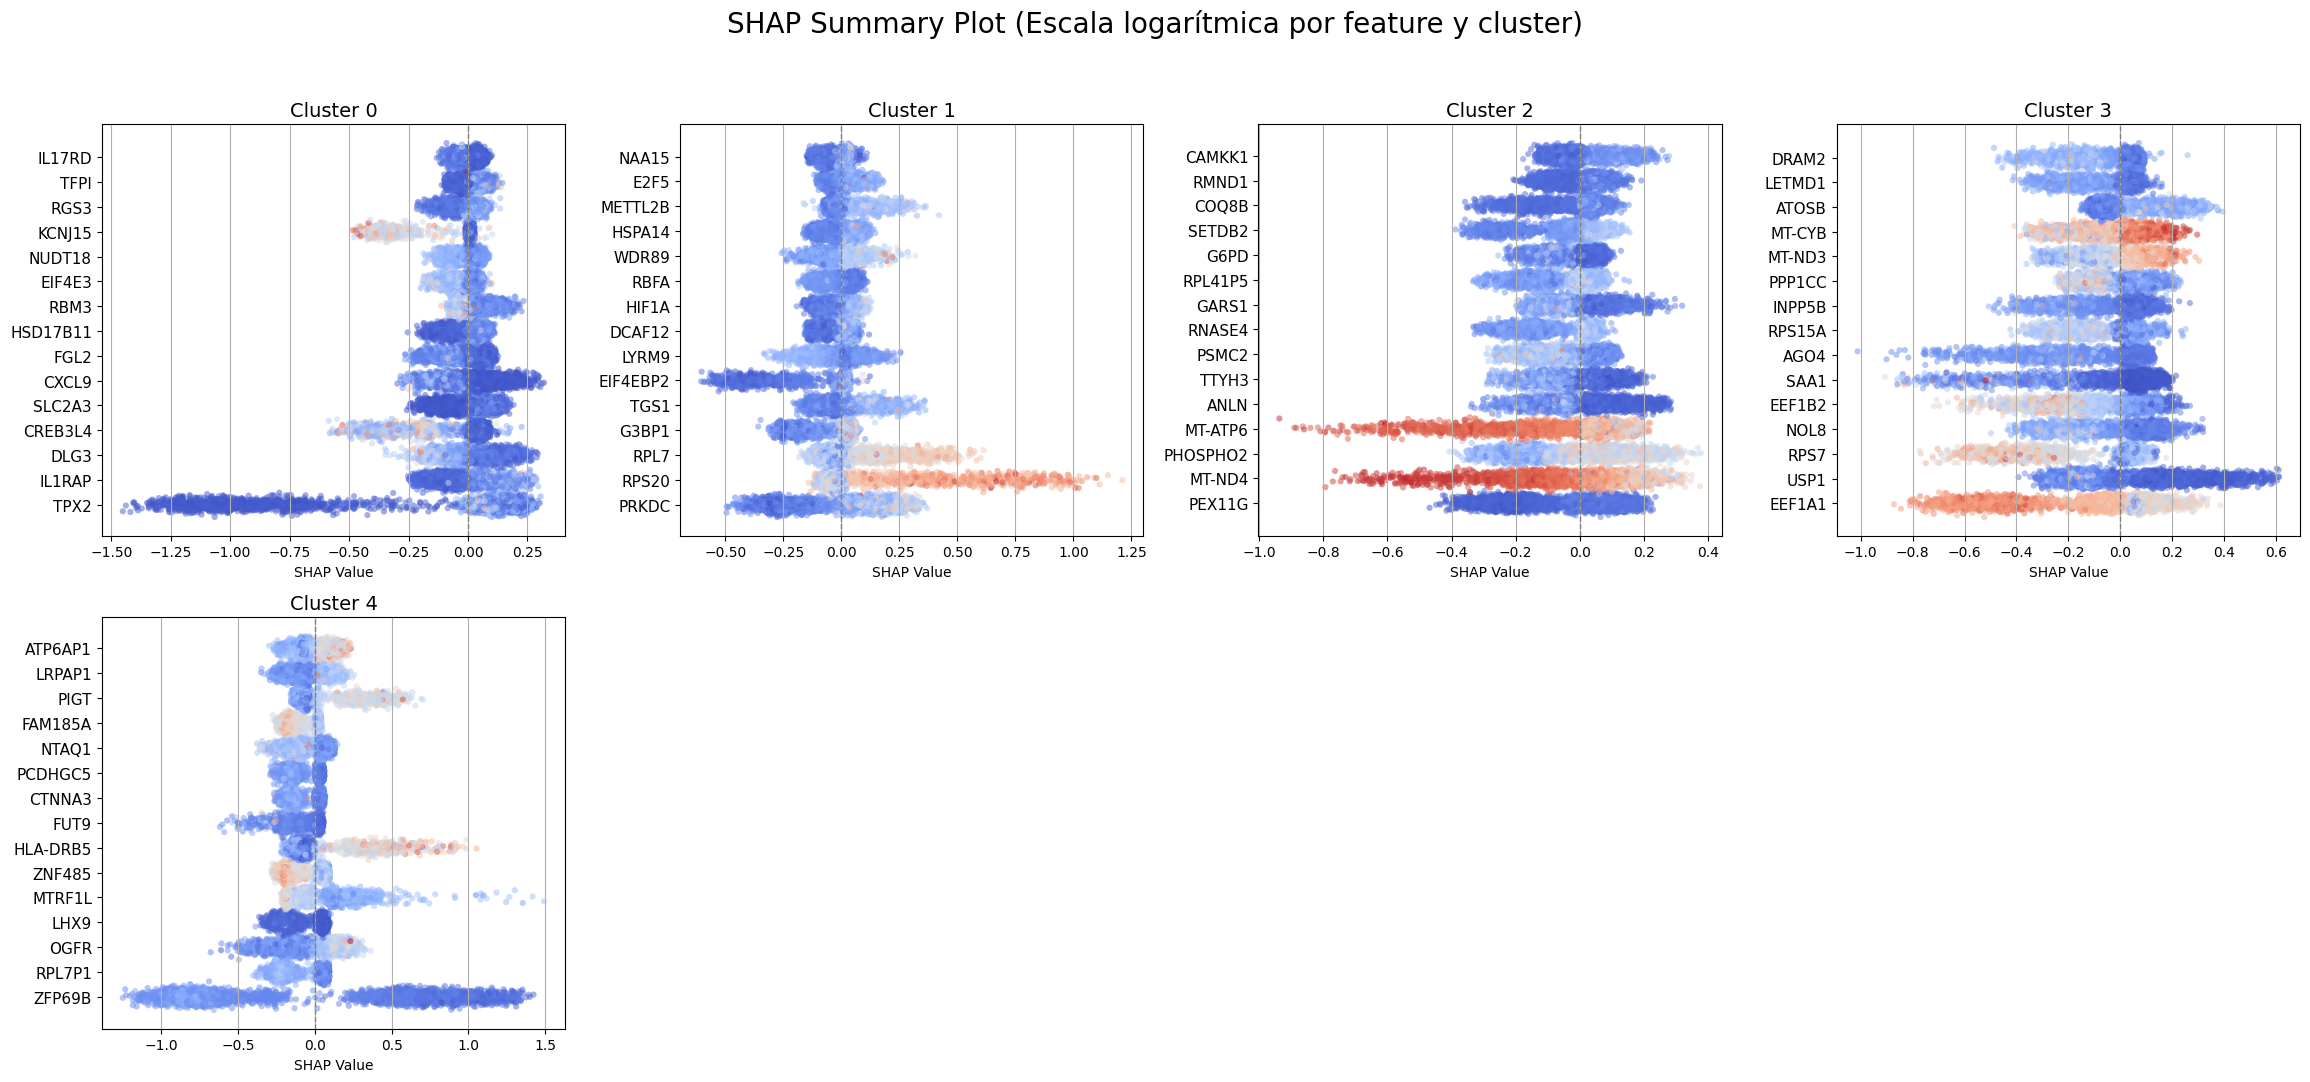

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import math

def custom_summary_plot_log_scaled_colors(shap_values, X, feature_names=None, max_display=15, ncols=5, cmap="coolwarm"):
    import matplotlib.pyplot as plt
    import numpy as np
    import math

    n_samples, n_features, n_classes = shap_values.shape
    feature_names = feature_names or X.columns.tolist()

    nrows = math.ceil(n_classes / ncols)
    fig, axes = plt.subplots(nrows, ncols, figsize=(5.8 * ncols, 5.5 * nrows), sharey=False)
    axes = axes.flatten()

    def log_transform(x):
        return np.sign(x) * np.log1p(np.abs(x))  # log(1 + |x|) * sign(x)

    for cls in range(n_classes):
        ax = axes[cls]

        # Importancia por cluster
        importance = np.abs(shap_values[:, :, cls]).mean(axis=0)
        top_indices = np.argsort(importance)[-max_display:][::-1]
        top_features = [feature_names[i] for i in top_indices]

        for pos, i in enumerate(top_indices):
            shap_vals = shap_values[:, i, cls]
            raw_vals = X.iloc[:, i].values

            # 🔥 Transformación logarítmica simétrica
            transformed_vals = log_transform(raw_vals)

            # 🔁 Normalización dentro del feature y cluster
            val_min = transformed_vals.min()
            val_max = transformed_vals.max()
            if val_max == val_min:
                norm_vals = np.zeros_like(transformed_vals)
            else:
                norm_vals = (transformed_vals - val_min) / (val_max - val_min)

            ax.scatter(
                shap_vals,
                np.full_like(shap_vals, pos) + np.random.normal(0, 0.15, size=len(shap_vals)),
                c=norm_vals,
                cmap=cmap,
                alpha=0.5,
                edgecolors='none',
                s=20
            )

        ax.set_title(f"Cluster {cls}", fontsize=14)
        ax.set_xlabel("SHAP Value")
        ax.set_yticks(range(len(top_features)))
        ax.set_yticklabels(top_features, fontsize=11)
        ax.axvline(0, color="grey", linestyle="--", linewidth=1)
        ax.grid(True, axis="x")

    for i in range(n_classes, len(axes)):
        fig.delaxes(axes[i])

    plt.suptitle("SHAP Summary Plot (Escala logarítmica por feature y cluster)", fontsize=20)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()



custom_summary_plot_log_scaled_colors(np.array(shap_values), X_sample, ncols=4)


In [ ]:
import pandas as pd
import numpy as np

def top_features_csv(shap_values, X, top_n=500, output_csv="top_features_by_cluster.csv"):
    n_samples, n_features, n_clusters = shap_values.shape
    feature_names = X.columns.tolist()

    # Diccionario para guardar los tops por clúster
    top_features_dict = {}

    for cls in range(n_clusters):
        importance = np.abs(shap_values[:, :, cls]).mean(axis=0)
        top_indices = np.argsort(importance)[-top_n:][::-1]
        top_features = [feature_names[i] for i in top_indices]
        top_features_dict[f"Cluster_{cls}"] = top_features

    # Crear DataFrame con los top N features por clúster
    top_features_df = pd.DataFrame(top_features_dict)

    # Guardar a CSV
    top_features_df.to_csv(output_csv, index=False)
    print(f"CSV saved as '{output_csv}'")

    return top_features_df
top_features_csv(np.array(shap_values), X_sample, top_n=500)


CSV saved as 'top_features_by_cluster.csv'


Cluster_0 Cluster_1 Cluster_2 Cluster_3 Cluster_4
0        TPX2     PRKDC    PEX11G    EEF1A1    ZFP69B
1      IL1RAP     RPS20  PHOSPHO2      USP1    RPL7P1
2        DLG3      RPL7    MT-ND4      RPS7      OGFR
3     CREB3L4     G3BP1   MT-ATP6      NOL8      LHX9
4      SLC2A3      TGS1      ANLN    EEF1B2    MTRF1L
..        ...       ...       ...       ...       ...
495  ARHGAP24       FTO  ARHGEF28   TMEM168    POU3F2
496     MRPL4      NCLN   SIPA1L1    TBC1D2      E2F6
497     ANPEP    SRGAP2     NUDT3      RPS9      TSR3
498      ATF5   SLC16A3  TMEM126A     NBPF1     TMA16
499    CHAF1B     NACC1    EEF1A1   ATG16L1      NOL3

[500 rows x 5 columns]

<ipython-input-34-24cbafdedd8f>:70: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
<ipython-input-34-24cbafdedd8f>:70: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
<ipython-input-34-24cbafdedd8f>:70: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
<ipython-input-34-24cbafdedd8f>:70: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
<ipython-input-34-24cbafdedd8f>:70: UserWarning: set_ticklabels() should

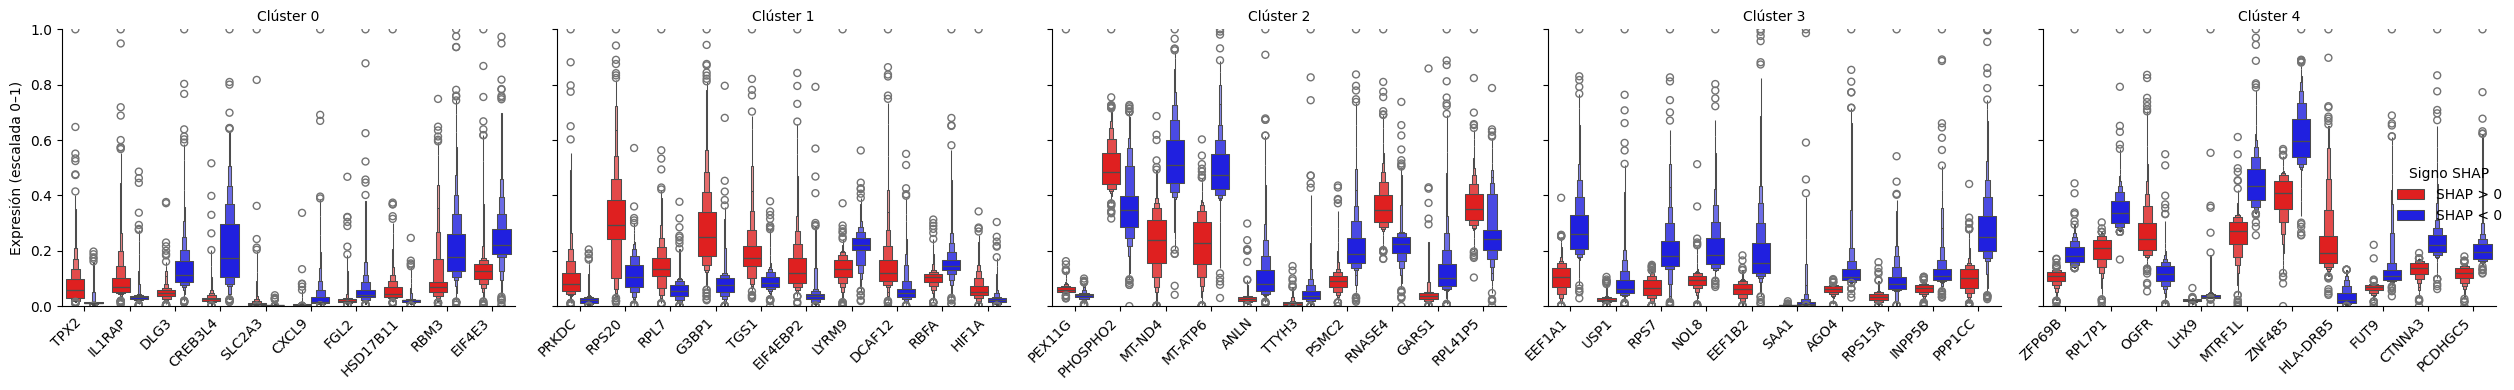

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def final_violin_plot_scaled_0_1_no_outliers(shap_values, X, top_n=10):
    """
    Para cada cluster:
      1) Selecciona sus top_n genes por mean(|SHAP|).
      2) Escala la expresión de cada gen entre 0 y 1 (min‑max).
      3) Dibuja boxen plots de Expr_norm para SHAP>0 vs SHAP<0 (rojo y azul).
      4) No muestra inner boxplot ni outliers; todos los facets comparten eje y.
    """
    n_samples, n_features, n_clusters = shap_values.shape
    feature_names = X.columns.tolist()

    # 1) Recolectar datos
    rows = []
    for cls in range(n_clusters):
        imp = np.abs(shap_values[:, :, cls]).mean(axis=0)
        top_idx = np.argsort(imp)[::-1][:top_n]
        for idx in top_idx:
            gene = feature_names[idx]
            shap_vals = shap_values[:, idx, cls]
            expr = X[gene].values
            pos = expr[shap_vals > 0]
            neg = expr[shap_vals < 0]
            if len(pos)==0 or len(neg)==0:
                continue
            rows += [
                {"Cluster":f"Clúster {cls}", "Feature":gene,
                 "Expression":v, "Signo SHAP":"SHAP > 0"}
                for v in pos
            ] + [
                {"Cluster":f"Clúster {cls}", "Feature":gene,
                 "Expression":v, "Signo SHAP":"SHAP < 0"}
                for v in neg
            ]

    df = pd.DataFrame(rows)
    if df.empty:
        print("❌ No hay datos válidos para graficar.")
        return df

    # 2) Escalar 0–1 por gen
    df["Expr_norm"] = (
        df.groupby("Feature")["Expression"]
          .transform(lambda x: (x - x.min())/(x.max() - x.min()))
    )

    # 3) Plot con colores rojo/azul
    g = sns.catplot(
        data=df,
        x="Feature", y="Expr_norm",
        hue="Signo SHAP", col="Cluster",
        kind="boxen",
        sharey=True, sharex=False,
        palette={"SHAP > 0": "red", "SHAP < 0": "blue"},
        height=4, aspect=1.2
    )

    # 4) Ajustes finales en español
    g.set_titles("{col_name}")
    g.set_axis_labels("", "Expresión (escalada 0–1)")
    # Cambiar título de la leyenda
    g._legend.set_title("Signo SHAP")
    # Rotar etiquetas del eje x
    for ax in g.axes.flatten():
        ax.set_ylim(0, 1)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

    plt.tight_layout()
    plt.show()

    return df


# Ejemplo de uso:
df_plot = final_violin_plot_scaled_0_1_no_outliers(
    np.array(shap_values), X_sample, top_n=10 )


<ipython-input-40-0ba3b440e495>:86: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
<ipython-input-40-0ba3b440e495>:86: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
<ipython-input-40-0ba3b440e495>:86: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
<ipython-input-40-0ba3b440e495>:86: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
<ipython-input-40-0ba3b440e495>:86: UserWarning: set_ticklabels() should

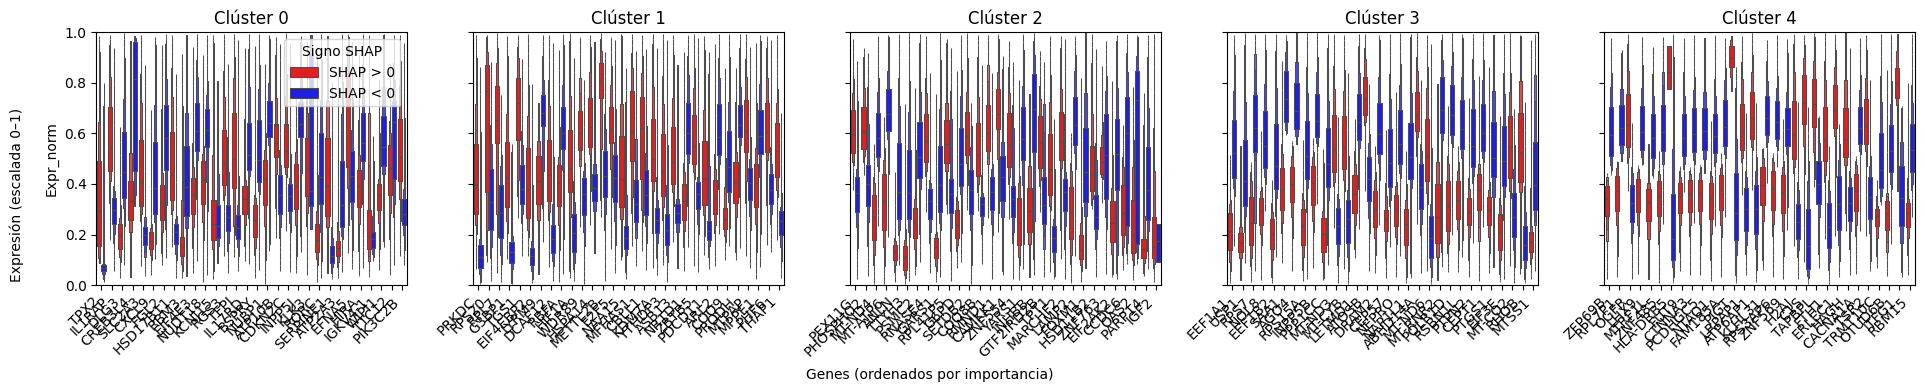

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def final_violin_plot_scaled_0_1_no_outliers(shap_values, X, top_n=10):
    """
    Para cada cluster:
      1) Selecciona sus top_n genes por mean(|SHAP|).
      2) Elimina outliers (criterio IQR) por gen.
      3) Escala la expresión de cada gen entre 0 y 1 (min‑max).
      4) Dibuja boxen plots de Expr_norm para SHAP>0 vs SHAP<0 (rojo y azul).
      5) Clusters en orden 0→n_clusters-1 de izq→der, genes ordenados por importancia.
    """
    n_samples, n_features, n_clusters = shap_values.shape
    feature_names = X.columns.tolist()

    # 1) Calculamos top genes por cluster
    top_genes = {}
    for cls in range(n_clusters):
        imp = np.abs(shap_values[:, :, cls]).mean(axis=0)
        top_idx = np.argsort(imp)[::-1][:top_n]
        top_genes[cls] = [feature_names[i] for i in top_idx]

    # 2) Recolectamos datos en filas
    rows = []
    for cls in range(n_clusters):
        for gene in top_genes[cls]:
            idx = feature_names.index(gene)
            shap_vals = shap_values[:, idx, cls]
            expr = X[gene].values
            pos = expr[shap_vals > 0]
            neg = expr[shap_vals < 0]
            if len(pos)==0 or len(neg)==0:
                continue
            rows += [
                {"Cluster":f"Clúster {cls}", "Feature":gene,
                 "Expression":v, "Signo SHAP":"SHAP > 0"}
                for v in pos
            ] + [
                {"Cluster":f"Clúster {cls}", "Feature":gene,
                 "Expression":v, "Signo SHAP":"SHAP < 0"}
                for v in neg
            ]

    df = pd.DataFrame(rows)
    if df.empty:
        print("❌ No hay datos válidos para graficar.")
        return df

    # 3) Eliminar outliers por gen (IQR) con transform
    q1 = df.groupby("Feature")["Expression"].transform(lambda x: x.quantile(0.25))
    q3 = df.groupby("Feature")["Expression"].transform(lambda x: x.quantile(0.75))
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    df = df[(df.Expression >= lower) & (df.Expression <= upper)]

    # 4) Escalar 0–1 por gen
    df["Expr_norm"] = (
        df.groupby("Feature")["Expression"]
          .transform(lambda x: (x - x.min())/(x.max() - x.min()))
    )

    # 5) Plot en subplots para controlar orden por cluster y genes
    fig, axes = plt.subplots(1, n_clusters, sharey=True,
                             figsize=(4 * n_clusters, 4))
    for cls, ax in enumerate(axes):
        df_cls = df[df["Cluster"] == f"Clúster {cls}"]
        # Solo genes que sobrevivieron al IQR
        genes_order = [g for g in top_genes[cls]
                       if g in df_cls["Feature"].unique()]

        sns.boxenplot(
            data=df_cls,
            x="Feature", y="Expr_norm",
            hue="Signo SHAP",
            order=genes_order,
            palette={"SHAP > 0": "red", "SHAP < 0": "blue"},
            ax=ax,
            showfliers=False
        )
        ax.set_title(f"Clúster {cls}")
        ax.set_xlabel("")
        ax.set_ylim(0, 1)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
        if cls > 0:
            ax.get_legend().remove()

    # Leyenda solo en el primer panel
    axes[0].legend(title="Signo SHAP", loc="upper right")

    # Etiquetas globales
    fig.text(0.5, 0.04, "Genes (ordenados por importancia)", ha='center')
    fig.text(0.04, 0.5, "Expresión (escalada 0–1)", va='center', rotation='vertical')

    plt.tight_layout(rect=[0.05, 0.05, 1, 1])
    plt.show()

    return df


# Ejemplo de uso:
df_plot = final_violin_plot_scaled_0_1_no_outliers(
    np.array(shap_values), X_sample, top_n=30 )


<ipython-input-43-a6a0aa25d375>:90: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
<ipython-input-43-a6a0aa25d375>:90: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
<ipython-input-43-a6a0aa25d375>:90: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
<ipython-input-43-a6a0aa25d375>:90: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
<ipython-input-43-a6a0aa25d375>:90: UserWarning: set_ticklabels() should

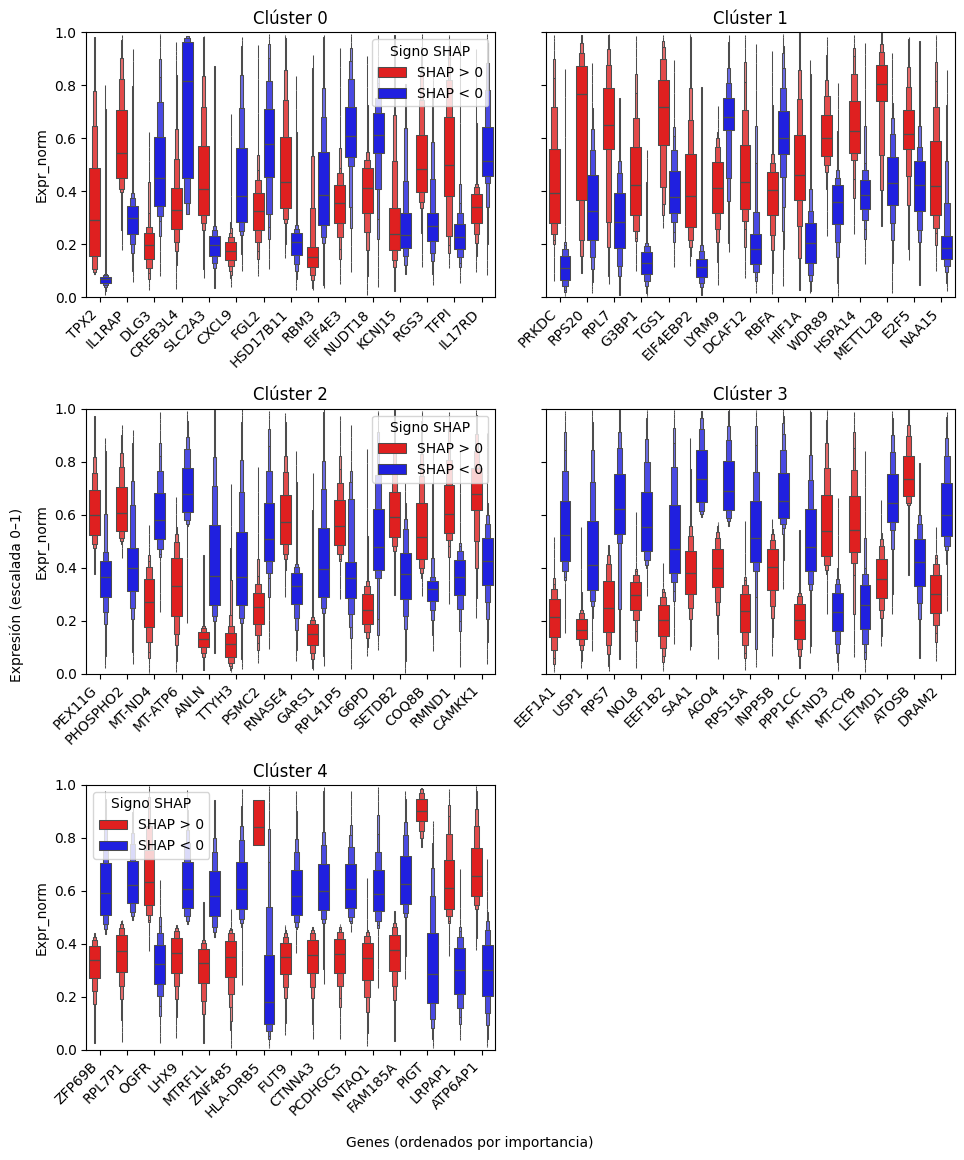

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

def final_violin_plot_scaled_0_1_no_outliers_2col(shap_values, X, top_n=10):
    """
    Para cada cluster:
      1) Selecciona sus top_n genes por mean(|SHAP|).
      2) Elimina outliers (criterio IQR) por gen.
      3) Escala la expresión de cada gen entre 0 y 1 (min‑max).
      4) Dibuja boxen plots de Expr_norm para SHAP>0 vs SHAP<0 (rojo y azul).
      5) Organiza los clusters en un grid de 2 columnas.
    """
    n_samples, n_features, n_clusters = shap_values.shape
    feature_names = X.columns.tolist()

    # 1) Top genes por cluster
    top_genes = {}
    for cls in range(n_clusters):
        imp = np.abs(shap_values[:, :, cls]).mean(axis=0)
        top_idx = np.argsort(imp)[::-1][:top_n]
        top_genes[cls] = [feature_names[i] for i in top_idx]

    # 2) Recolectar datos
    rows = []
    for cls in range(n_clusters):
        for gene in top_genes[cls]:
            idx = feature_names.index(gene)
            shap_vals = shap_values[:, idx, cls]
            expr = X[gene].values
            pos = expr[shap_vals > 0]
            neg = expr[shap_vals < 0]
            if len(pos) == 0 or len(neg) == 0:
                continue
            rows += [
                {"Cluster": f"Clúster {cls}", "Feature": gene,
                 "Expression": v, "Signo SHAP": "SHAP > 0"}
                for v in pos
            ] + [
                {"Cluster": f"Clúster {cls}", "Feature": gene,
                 "Expression": v, "Signo SHAP": "SHAP < 0"}
                for v in neg
            ]

    df = pd.DataFrame(rows)
    if df.empty:
        print("❌ No hay datos válidos para graficar.")
        return df

    # 3) Eliminar outliers (IQR) por gen
    q1 = df.groupby("Feature")["Expression"].transform(lambda x: x.quantile(0.25))
    q3 = df.groupby("Feature")["Expression"].transform(lambda x: x.quantile(0.75))
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    df = df[(df.Expression >= lower) & (df.Expression <= upper)]

    # 4) Escalar 0–1 por gen
    df["Expr_norm"] = (
        df.groupby("Feature")["Expression"]
          .transform(lambda x: (x - x.min())/(x.max() - x.min()))
    )

    # 5) Grid de 2 columnas
    cols = 2
    rows_n = math.ceil(n_clusters / cols)
    fig, axes = plt.subplots(rows_n, cols, sharey=True,
                             figsize=(cols * 5, rows_n * 4))
    axes = axes.flatten()

    for cls in range(n_clusters):
        ax = axes[cls]
        df_cls = df[df["Cluster"] == f"Clúster {cls}"]
        genes_order = [g for g in top_genes[cls] if g in df_cls["Feature"].unique()]

        sns.boxenplot(
            data=df_cls,
            x="Feature", y="Expr_norm",
            hue="Signo SHAP",
            order=genes_order,
            palette={"SHAP > 0": "red", "SHAP < 0": "blue"},
            ax=ax,
            showfliers=False
        )
        ax.set_title(f"Clúster {cls}")
        ax.set_xlabel("")
        ax.set_ylim(0, 1)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
        if cls % cols != 0:
            ax.get_legend().remove()

    # Ocultar ejes extra si n_clusters es impar
    for j in range(n_clusters, len(axes)):
        fig.delaxes(axes[j])

    # Leyenda solo en el primer panel
    axes[0].legend(title="Signo SHAP", loc="upper right")

    # Etiquetas globales
    fig.text(0.5, 0.04, "Genes (ordenados por importancia)", ha='center')
    fig.text(0.04, 0.5, "Expresión (escalada 0–1)", va='center', rotation='vertical')

    plt.tight_layout(rect=[0.05, 0.05, 1, 1])
    plt.show()

    return df
# Ejemplo de uso:
df_plot = final_violin_plot_scaled_0_1_no_outliers_2col(
    np.array(shap_values), X_sample, top_n=15 )
